##  <span style='background :#96e773' > 1. Introduction </span>

XXX

In [174]:
# Importation des librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sys
import statsmodels.api as sm
import sklearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Versions
print('Version des librairies utilisées:')
print('Python ' + sys.version)
print('Pandas ' + pd.__version__)
print('NumPy ' + np.__version__)
print('Seaborn ' + sns.__version__)
print('Matplotlib ' + matplotlib.__version__)
print('Sklearn ' + sklearn.__version__)

Version des librairies utilisées:
Python 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
Pandas 1.5.2
NumPy 1.23.5
Seaborn 0.12.2
Matplotlib 3.5.3
Sklearn 1.2.2


In [175]:
from matplotlib import rcParams

# Définition des tailles de polices des figures


SMALL_SIZE = 15
MEDIUM_SIZE = 16
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)

rcParams['axes.titlepad'] = 20
plt.rcParams['figure.dpi'] = 100

sns.set(style="darkgrid")

**Fonctions**

In [176]:
def dim(df):
    x, y = df.shape
    print(f'Le jeu de données contient {x} lignes et {y} colonnes.')

In [177]:
def missing_values(df):
    a = df.isna().sum().sum()
    b = round(df.isna().mean().mean() * 100, 3)
    print(f'Le jeu de données contient {a} valeurs manquantes ({b}%).')

In [178]:
def recap_missing_values(df):
    df = pd.DataFrame(df)
    a = df.notna().sum()
    b = df.isna().sum()
    c = round((1 - df.isna().mean()) * 100, 3)
    d = pd.concat([a, b, c], axis=1).reset_index()
    d.columns = ['Variable',
                 'Nombre de valeurs renseignées',
                 'Nombre de valeurs manquantes',
                 'Taux de remplissage (%)']
    return d

In [179]:
# Distribution empirique

def distri(df, col, xlim=None, line=True, kde=True, log=False):
    sns.set(style="darkgrid")

    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    # noinspection PyTypeChecker
    g, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(7, 5))

    # assigning a graph to each ax
    sns.boxplot(x=df[col], ax=ax_box)
    sns.histplot(x=df[col], ax=ax_hist, kde=kde)

    # Remove x-axis name for the boxplot
    ax_box.set(xlabel='')

    mean = round(df[col].mean(), 2)
    median = round(df[col].median(), 2)
    std = round(df[col].std(ddof=0), 2)
    c_var = round(std / mean, 2)
    skew = round(df[col].skew(), 2)
    kurtosis = round(df[col].kurtosis(), 2)

    mean_text = "mean = " + str(mean)
    median_text = "median = " + str(median)
    std_text = "std = " + str(std)
    c_var_text = "coeff var = " + str(c_var)
    skew_text = "skew = " + str(skew)
    kurtosis_text = "kurtosis = " + str(kurtosis)

    plt.text(0.75, 0.4,
             mean_text + "\n" + median_text + "\n" + std_text + "\n" + c_var_text + "\n" + skew_text + "\n" + kurtosis_text,
             fontsize=12, color='k',
             ha='left', va='bottom',
             transform=plt.gca().transAxes)

    if line:

        ax_hist.axvline(mean, color='red', linestyle='--', linewidth="2", label="mean")
        ax_hist.axvline(median, color='mediumblue', linestyle='-.', linewidth="2", label="median")
        plt.legend()
    else:
        pass

    if log:
        ax_hist.set_yscale('log')
    else:
        pass

    if xlim:
        plt.xlim(xlim)

    plt.show()

In [180]:
# Distribution empirique et QQ plot

def distri_qq(df, col, line=True, log=False):
    sns.set(style="darkgrid")

    df = df.dropna(subset=col)

    gs_kw = dict(width_ratios=[1, 0.8], height_ratios=[.15, .85])

    fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                                   ['lower left', 'right']],
                                  gridspec_kw=gs_kw, figsize=(12, 5),
                                  layout="constrained")

    sns.boxplot(x=df[col], ax=axd['upper left'])
    sns.histplot(x=df[col], kde=True, ax=axd['lower left'])
    sm.qqplot(df[col], line="s", ax=axd['right'])

    axd['upper left'].set(xlabel='')
    axd['upper left'].grid(True)
    axd['upper left'].set_xticklabels([])

    mean = round(df[col].mean(), 2)
    median = round(df[col].median(), 2)
    std = round(df[col].std(ddof=0), 2)
    c_var = round(std / mean, 2)
    skew = round(df[col].skew(), 2)
    kurtosis = round(df[col].kurtosis(), 2)

    mean_text = "mean = " + str(mean)
    median_text = "median = " + str(median)
    std_text = "std = " + str(std)
    c_var_text = "coeff var = " + str(c_var)
    skew_text = "skew = " + str(skew)
    kurtosis_text = "kurtosis = " + str(kurtosis)

    plt.text(0.75, 0.5,
             mean_text + "\n" + median_text + "\n" + std_text + "\n" + c_var_text + "\n" + skew_text + "\n" + kurtosis_text,
             fontsize=12, color='k',
             ha='left', va='bottom',
             transform=plt.gca().transAxes)

    if line:

        axd['lower left'].axvline(mean, color='red', linestyle='--', linewidth="2", label="mean")
        axd['lower left'].axvline(median, color='mediumblue', linestyle='-.', linewidth="2", label="median")
        plt.legend()

    else:
        pass

    if log:
        axd['lower left'].set_yscale('log')
    else:
        pass

    plt.show()

In [181]:
def pie(df, col, titre, explode=True):
    plt.title(titre)

    nbr = df[col].value_counts().sort_index()

    if explode:
        explode = [0.1]
        for i in range(len(nbr) - 1):
            explode.append(0)
    else:
        explode = [0]
        for i in range(len(nbr) - 1):
            explode.append(0)

    plt.pie(nbr, explode=explode, labels=nbr.index, autopct='%1.1f%%',
            textprops={'fontsize': 14, 'color': 'black', 'backgroundcolor': 'w'}, startangle=90)

    plt.axis('equal')
    plt.show()

In [182]:
def distri_ordinale(df, col, titre, figsize, rotation=False):
    fig, (ax_bar, ax_pie) = plt.subplots(1, 2, figsize=figsize)

    order = df[col].value_counts().sort_index().index

    sns.countplot(data=df, x=col, order=order, ax=ax_bar)

    nbr = df[col].sort_values().value_counts().sort_index()

    explode = [0.1]
    for i in range(len(nbr) - 1):
        explode.append(0)

    ax_pie.pie(nbr, explode=explode, labels=nbr.index, autopct='%1.1f%%',
               textprops={'fontsize': 14, 'color': 'black', 'backgroundcolor': 'w'}, startangle=90)

    plt.axis('equal')
    if rotation:
        ax_bar.tick_params(axis='x', rotation=20)

    else:
        pass

    fig.suptitle(titre)
    plt.show()

In [183]:
def stacked_bar(df, x_var, y_var, figsize, text_color, colors):
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).sort_index().unstack()
    df_grouped = df_grouped.fillna(0)
    # display(df_grouped)

    ax = df_grouped.plot.barh(stacked=True, color=colors, figsize=figsize)

    plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=df_grouped.shape[1] + 1,
        fontsize=12,
        title=str(y_var),
        title_fontsize=12
    )

    for ix, row in df_grouped.reset_index(drop=True).iterrows():

        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(cumulative + element / 2, ix, f"{int(element * 100)} %", va="center", ha="center", fontsize=12,
                         color=text_color, weight='bold')
            cumulative += element

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)

In [184]:
def kdeplot(df, col, hue, color, figsize):
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    sns.kdeplot(x=df[col], hue=df[hue], common_norm=False, palette=color, linewidth=2)

    plt.show()

In [185]:
def correlation_graph(pca,
                      x_y,
                      features):
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x, y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):
        # Les flèches
        ax.arrow(0, 0,
                 pca.components_[x, i],
                 pca.components_[y, i],
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02, length_includes_head=True)

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i],
                 features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('PC{} ({}%)'.format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1)))

    plt.title("Cercle des corrélations (PC{} et PC{})".format(x + 1, y + 1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [186]:
def display_factorial_planes(X_projected,
                             x_y,
                             pca=None,
                             labels=None,
                             clusters=None,
                             c_dict=None,
                             alpha=0.5,
                             figsize=(10, 8),
                             marker="."):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7, 6)

    # On vérifie la variable axis
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("la variable axis n'est pas bonne")

    # On définit x et y
    x = x_y[0]
    y = x_y[1]

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] = clusters if clusters is not None else "None"
    X_["labels"] = labels

    # c_dict = {'a':'#00803d', 'b': '#86bc25', 'c':'#ffcc00', 'd':'#ef7d00', 'e':'#e53312'}
    # colors_nutri = ['#00803d', '#86bc25', '#ffcc00', '#ef7d00', '#e53312']

    if c_dict is None:
        c_unique_list = X_["clusters"].sort_values().unique()
        c_dict = {j: i + 1 for i, j in enumerate(c_unique_list)}

    X_["colors"] = X_["clusters"].apply(lambda i: c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()):
        # On sélectionne le sous DF
        sub_X = X_.loc[X_.clusters == c, :]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        if clusters is None:

            ax.scatter(sub_X.iloc[:, x],
                       sub_X.iloc[:, y],
                       alpha=alpha,
                       label=cluster,
                       marker=marker)

        else:

            ax.scatter(sub_X.iloc[:, x],
                       sub_X.iloc[:, y],
                       alpha=alpha,
                       label=cluster,
                       color=color,
                       marker=marker)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca:
        v1 = str(round(100 * pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100 * pca.explained_variance_ratio_[y])) + " %"
    else:
        v1 = v2 = ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x + 1} {v1}')
    ax.set_ylabel(f'PC{y + 1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() * 1.1
    y_max = np.abs(X_.iloc[:, y]).max() * 1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    if labels is not None:
        for i, (x, y) in enumerate(X_projected[:, [x, y]]):
            ax.text(x, y + 0.05, labels[i], fontsize='11', ha='center', va='center')

    # Titre, legend et display
    plt.title(f"Projection des individus (sur PC{x + 1} et PC{y + 1})")
    if clusters is not None:
        plt.legend()
    plt.show()

In [187]:
def return_row_max(df, col):
    row_max = df[df[col] == df[col].max()]

    return row_max

In [188]:
def return_row_min(df, col):
    row_min = df[df[col] == df[col].min()]

    return row_min

In [189]:
def outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)

    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    outliers = df[((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))].sort_values(by=col, ascending=False)

    return outliers

In [190]:
def getDuplicateColumns(df):
    # Create an empty set
    duplicateColumnNames = set()

    # Iterate through all the columns
    # of dataframe
    for x in range(df.shape[1]):

        # Take column at xth index.
        col = df.iloc[:, x]

        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):

            # Take column at yth index.
            otherCol = df.iloc[:, y]

            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])

    # Return list of unique column names
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [191]:
def period(df, col):
    debut = df[col].min().strftime('%d/%m/%Y')
    fin = df[col].max().strftime('%d/%m/%Y')
    print(f'Période: du {debut} au {fin}')

In [192]:
def recap_doublons(df):
    result = pd.DataFrame()
    temp = []
    df = df.select_dtypes(exclude=np.number)
    list_col = list(df.columns)

    for col in list_col:
        d = df[col].duplicated(keep='first').sum()
        temp.append(d)

        result.index = list_col
        result.index.name = 'variable'

    result['Nombre de doublons'] = temp
    return result

In [193]:
def show_doublons(df, col):
    return df[df.duplicated(col, keep=False)].sort_values(by=col)

In [194]:
def variables_avec_plusieurs_entrees(df, key):
    temp = df.groupby(key)[df.columns].nunique().reset_index(drop=True)
    temp = temp.drop_duplicates()
    temp = temp.mean()

    liste = temp[temp > 1].index.tolist()

    return liste

In [195]:
def print_variable_avec_plusieurs_entrees(df, key, var):
    temp = df.groupby(key)[var].nunique().reset_index()
    result = df[df[key].isin(temp[temp[var] > 1][key])].sort_values(by=key)

    return result

In [196]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


def plot_davies_bouldin(df, k1, k2):
    davies = {}

    for k in range(k1, k2 + 1):
        kmeans = KMeans(n_clusters=k, n_init=100, random_state=42)
        kmeans.fit_predict(df)
        labels = kmeans.labels_

        davies[k] = davies_bouldin_score(df, labels)

    plt.figure(figsize=(6, 4))
    sns.lineplot(x=list(davies.keys()), y=list(davies.values()), marker="D")
    plt.title('Davies Bouldin Score Elbow for KMeans Clustering')
    plt.xlabel('k')
    plt.ylabel('davies bouldin score')
    plt.show()

In [197]:
from sklearn.metrics.cluster import adjusted_rand_score


def cluster_ARI(labels, predicted_labels):
    ari = adjusted_rand_score(labels, predicted_labels)
    print("Adjusted Rand Index (ARI):", ari)

In [198]:
from sklearn.metrics import normalized_mutual_info_score


def cluster_NMI(labels, predicted_labels):
    nmi = normalized_mutual_info_score(labels, predicted_labels)
    print("Normalized Mutual Information (NMI):", nmi)

In [199]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [200]:
def detect_outliers(df, var, n, method='all', quantile_low=0.05, quantile_high=0.95, std_dev=3, iqr_factor=1.5):
    """
    Detects outliers in a pandas DataFrame using one or more methods.

    Parameters:
    - df: pandas DataFrame to be checked for outliers
    - n: minimum number of methods that must tag a data point as an outlier for it to be considered an outlier (default: 2)
    - method: one of 'all', 'percentile', 'std_dev', or 'iqr'; the outlier detection method to be used (default: 'all')
    - percentile_low: lower percentile value used in percentile method (default: 5)
    - percentile_high: upper percentile value used in percentile method (default: 95)
    - std_dev: number of standard deviations used in standard deviation method (default: 3)
    - iqr: number of interquartile ranges used in interquartile range method (default: 1.5)

    Returns:
    - outlier_df: pandas DataFrame with an additional column 'outlier' containing a boolean value indicating whether each data point is an outlier or not
    """
    outlier_count = np.zeros(len(df))

    if method in ('all', 'percentile'):
        q1 = df[var].quantile(quantile_low)
        q3 = df[var].quantile(quantile_high)
        is_outlier_percentile = (df[var] < q1) | (df[var] > q3)
        outlier_count += is_outlier_percentile

    if method in ('all', 'std_dev'):
        std = np.std(df[var], axis=0)
        mean = np.mean(df[var], axis=0)
        is_outlier_std_dev = np.abs(df[var] - mean) > std_dev * std
        outlier_count += is_outlier_std_dev

    if method in ('all', 'iqr'):
        q1 = df[var].quantile(0.25)
        q3 = df[var].quantile(0.75)
        iqr = q3 - q1
        is_outlier_iqr = (df[var] < q1 - iqr * iqr_factor) | (df[var] > q3 + iqr * iqr_factor)
        outlier_count += is_outlier_iqr

    outlier_df = df.copy()
    outlier_df['outlier_count'] = outlier_count

    return outlier_df[outlier_df['outlier_count']>=n].sort_values(by=var, ascending=False)

In [201]:
def linear_reg(df, col1, col2):
    temp = df[[col1, col2]]
    temp = temp.dropna()

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()

    X = temp[col1].values.reshape(-1, 1)
    y = temp[col2].values.reshape(-1, 1)

    regressor.fit(X, y)
    pred = regressor.predict(X)
    pred = pd.DataFrame(pred)
    pred = pred.set_index(temp.index)

    temp['pred'] = pred
    temp['residual'] = temp[col2] - temp['pred']

    sns.scatterplot(x=col1, y=col2, data=temp)
    plt.plot(temp[col1], pred, color="red", linewidth=1)

    return temp

In [202]:
def percentile_report(df, columns):
    quantiles = [0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1]
    results = []
    for col in columns:
        col_results = []
        for q in quantiles:
            value = df[col].quantile(q)
            col_results.append(value)
        results.append(col_results)
    results_df = pd.DataFrame(results, columns=[f'{q*100}%' for q in quantiles], index=columns)
    return results_df

In [203]:
def compare_target_categ(df, var, figsize, rotate=False, order=False):
    sns.set(style="darkgrid")
    plt.figure(figsize=figsize)

    if order:
        temp = df.groupby(var)['TARGET'].mean().reset_index().rename(
            columns={'TARGET': 'Failure to Repay (%)'}).sort_values(by='Failure to Repay (%)', ascending=False)

    else:
        temp = df.groupby(var)['TARGET'].mean().reset_index().rename(columns={'TARGET': 'Failure to Repay (%)'})

    sns.barplot(temp, x=var, y='Failure to Repay (%)')

    if rotate:
        plt.xticks(rotation=90)
    plt.show()

In [204]:
def compare_target(df, var, xlim=None, common_norm=True, log_scale=False):
    sns.kdeplot(data=df, x=var, hue="TARGET", common_norm=common_norm, log_scale=log_scale)

    if xlim:
        plt.xlim(xlim)

    mean_0 = df[df['TARGET'] == 0][var].mean()
    mean_1 = df[df['TARGET'] == 1][var].mean()

    plt.axvline(mean_0, color=sns.color_palette()[0], linestyle='dashed', label=f'TARGET=0 Mean: {mean_0:.2f}')
    plt.axvline(mean_1, color=sns.color_palette()[1], linestyle='dashed', label=f'TARGET=1 Mean: {mean_1:.2f}')

    # Add legend and show plot
    plt.legend()
    plt.show()

In [205]:
def compute_mode_percentage(df, columns, threshold, pr=True):
    data = []
    for col in columns:
        mode = df[col].mode().values[0]
        mode_perc = df[col].value_counts(normalize=True)[mode]

        data.append({'Column': col, 'Mode': mode, 'Mode_pct': mode_perc})

    result_df = pd.DataFrame(data)
    col = result_df.loc[result_df['Mode_pct'] >= threshold, 'Column'].tolist()

    if pr:
        print(result_df.sort_values(by='Mode_pct'))
        print('')

    print('Liste des features à supprimer :')
    print(col)
    return col

In [206]:
def iv_woe(data, target, bins=10):
    #Empty Dataframe
    newDF = pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:

        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars])) > 10):
            binned_x = pd.qcut(data[ivars], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})

        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']

        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events'] / d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])

        d.insert(loc=0, column='Variable', value=ivars)

        temp = pd.DataFrame({"Variable": [ivars], "IV": [d['IV'].sum()]}, columns=["Variable", "IV"])
        newDF = pd.concat([newDF, temp], axis=0)

    return newDF

In [207]:
def comparaison_key(df1, df2, key1, key2):
    df1 = df1.dropna(subset=key1).drop_duplicates(subset=key1, keep='first')
    df2 = df2.dropna(subset=key2).drop_duplicates(subset=key2, keep='first')

    temp1 = df1[~df1[key1].isin(df2[key2])]

    if temp1.shape[0] == 0:
        print("Toutes les clés de df1 sont comprises dans df2")
    else:
        print(f'Nombre de clé de df1 absentes de df2 : {temp1.shape[0]}')
        return temp1

In [208]:
def print_rows_with_high_missing_values(df, threshold):
    """Prints rows with missing values above a specified threshold."""
    rows_with_high_missing = df[df.isna().sum(axis=1) > df.shape[1]*threshold]
    return rows_with_high_missing

In [209]:
def percentage_of_rows_above_threshold(df, threshold):
    """
    Computes the percentage of rows with a filling percentage below the threshold.
    """
    # Compute the percentage of missing values for each row
    row_missing_percentages = df.isnull().sum(axis=1) / df.shape[1]

    # Compute the percentage of rows with a filling percentage below the threshold
    above_threshold_percent = (row_missing_percentages > threshold).sum() / df.shape[0] * 100

    return above_threshold_percent

In [210]:
def detect_skew(data, threshold=0.5):

    skew_vals = data.skew().rename('skewness')
    kurt_vals = data.kurt().rename('kurtosis')
    skewness_df = pd.concat([skew_vals, kurt_vals], axis=1)
    skewness_df = skewness_df[np.abs(skewness_df['skewness']) > threshold].sort_values(by='skewness', ascending=False)
    return skewness_df

In [211]:
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [212]:
def get_age_label(days_birth):
    """ Return the age group label (int). """
    age_years = -days_birth / 365
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 60: return 4
    elif age_years < 99: return 5
    else: return 0

In [213]:
def check_for_inf(df):

    # select only the numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns

    # Count number of inf values
    n_inf = np.isinf(df[numeric_cols]).sum().sum()

    print(f'Nombre de valeurs infinies: {n_inf}')

    if n_inf > 0:

        # check for inf in the numeric columns
        inf_cols = df[numeric_cols][np.isinf(df[numeric_cols])].any()

        # print the column names with inf values
        print('Liste de features avec inf:')
        print(inf_cols.index[inf_cols].tolist())

In [214]:
def check_full_nan(df):

    nan_cols = df.columns[df.isna().all()].tolist()
    print('Liste de features full of nan:')
    print(nan_cols)

    df.drop(columns=nan_cols, inplace=True)

    return df

In [215]:
def flatten_multi_index(df, prefix):
    df.columns = pd.Index([prefix + e[0] + "_" + e[1].upper() for e in df.columns.tolist()])

    return df.reset_index()

In [216]:
def print_confusion_matrix(model, X, y_true):
    # Make predictions using the input data
    y_pred = model.predict(X)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap plot of the confusion matrix using Seaborn
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

    # Set plot labels
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

In [217]:
def plot_results(results_df, figsize):

    sns.set_style("darkgrid")

    fig, (ax_1, ax_2, ax_3, ax_4, ax_5) = plt.subplots(5, 1, figsize=figsize)

    sns.barplot(y=results_df["model"], x=results_df["f2_score_mean"], ax=ax_1, palette="GnBu_d")
    ax_1.set(xlabel='f2 score')
    ax_1.set(ylabel='')
    ax_1.bar_label(ax_1.containers[0], fmt="%.4f", size=12)

    sns.barplot(y=results_df["model"], x=results_df["roc_auc_mean"], ax=ax_2, palette="GnBu_d")
    ax_2.set(xlabel='ROC AUC')
    ax_2.set(ylabel='')
    ax_2.bar_label(ax_2.containers[0], fmt="%.4f", size=12)

    sns.barplot(y=results_df["model"], x=results_df["pr_auc_mean"], ax=ax_3, palette="GnBu_d")
    ax_3.set(xlabel='precision recall AUC')
    ax_3.set(ylabel='')
    ax_3.bar_label(ax_3.containers[0], fmt="%.4f", size=12)

    sns.barplot(y=results_df["model"], x=results_df["custom_score_mean"], ax=ax_4, palette="GnBu_d")
    ax_4.set(xlabel='custom score')
    ax_4.set(ylabel='')
    ax_4.bar_label(ax_4.containers[0], fmt="%.4f", size=12)

    sns.barplot(y=results_df["model"], x=results_df["time_mean"], ax=ax_5, palette="GnBu_d")
    ax_5.set(xlabel='mean time (s)')
    ax_5.set(ylabel='')
    ax_5.bar_label(ax_5.containers[0], fmt="%.4f", size=12)

    plt.tight_layout()
    plt.show()

<br>

---

##  <span style='background :#96e773' > 2. Chargement du jeu de données </span>

In [218]:
X_train_xgb_med = pd.read_csv('X_train_xgb_med.csv')
X_validation_xgb_med = pd.read_csv('X_validation_xgb_med.csv')
test_xgb_med = pd.read_csv('test_xgb_med.csv')

In [219]:
import joblib

selected_features = joblib.load('selected_features.joblib')
liste_totale_accepted = joblib.load('liste_totale_accepted.joblib')
selected_features_60 = joblib.load('selected_features_60.joblib')

In [220]:
X_train_fs_lgbm = X_train_xgb_med[selected_features]
X_valid_fs_lgbm = X_validation_xgb_med[selected_features]
test_fs_lgbm = test_xgb_med[['SK_ID_CURR'] + selected_features]

X_train_fs_cumul = X_train_xgb_med[liste_totale_accepted]
X_valid_fs_cumul = X_validation_xgb_med[liste_totale_accepted]
test_fs_cumul = test_xgb_med[['SK_ID_CURR'] + liste_totale_accepted]

X_train_fs_mini = X_train_xgb_med[selected_features_60]
X_valid_fs_mini = X_validation_xgb_med[selected_features_60]
test_fs_mini = test_xgb_med[['SK_ID_CURR'] + selected_features_60]

In [221]:
y_train = pd.read_csv('y_train.csv')
y_train = y_train.squeeze()

y_validation = pd.read_csv('y_validation.csv')
y_validation = y_validation.squeeze()

In [222]:
print(X_train_fs_lgbm.shape)
print(X_valid_fs_lgbm.shape)
print(test_fs_lgbm.shape)

print(X_train_fs_cumul.shape)
print(X_valid_fs_cumul.shape)
print(test_fs_cumul.shape)

print(X_train_fs_mini.shape)
print(X_valid_fs_mini.shape)
print(test_fs_mini.shape)

print(y_train.shape)
print(y_validation.shape)

(246003, 609)
(61501, 609)
(48744, 610)
(246003, 294)
(61501, 294)
(48744, 295)
(246003, 151)
(61501, 151)
(48744, 152)
(246003,)
(61501,)


<br>

---

##  <span style='background :#96e773' > 3. Model selection </span>
### <span style='background :#e3e33d' > 3.1 Définition des métriques </span>

Nous utiliserons les métriques suivantes :

- precision
- recall
- f1 score
- f2 score
- roc auc
- score personnalisé


In [223]:
from sklearn.metrics import make_scorer, confusion_matrix

def custom_score(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Extract the components of the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Calculate the custom score with different weights
    score = 1 * TN + 1 * TP - 1 * FP - 10 * FN

    # Calculate the best possible score
    best_score = 1 * (TN + FP) + 1 * (TP + FN)

    # Calculate the worst possible score
    worst_score = -1 * (TN + FP) - 10 * (TP + FN)

    # Normalize the score between 0 and 1
    normalized_score = (score - worst_score) / (best_score - worst_score)

    return normalized_score


# Create a scorer object for use with scikit-learn functions
custom_scorer = make_scorer(custom_score)

<br>

---

### <span style='background :#e3e33d' > 3.2 Comparaison des modèles </span>

In [224]:
def find_optimal_threshold(y_true, y_pred_probs, thresholds, score_func):
    best_threshold = thresholds[0]
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)

        if score_func == precision_score:

            score = precision_score(y_true, y_pred, zero_division=1.0)

        elif score_func ==  fbeta_score:

             score = fbeta_score(y_true, y_pred, beta=2)

        else:
            score = score_func(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return  best_score, best_threshold

In [225]:
def create_model_without_class_weights(model_name):
    if model_name == 'Logistic_Regression':
        return make_pipeline(StandardScaler(), LogisticRegression(random_state=42, n_jobs=-1))
    elif model_name == 'Random_Forest':
        return RandomForestClassifier(random_state=42, n_jobs=-1)
    elif model_name == 'Extra_Trees':
        return ExtraTreesClassifier(random_state=42, n_jobs=-1)
    elif model_name == 'LightGBM':
        return lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1)
    elif model_name == 'XGBoost':
        return XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)
    elif model_name == 'CatBoost':
        return CatBoostClassifier(random_state=42, silent=True)
    else:
        return models[model_name]

In [226]:
import mlflow
import mlflow.sklearn
import logging
logging.getLogger('mlflow').setLevel(logging.ERROR)

mlflow.set_tracking_uri('file:///E:\OneDrive\Data S\Openclassroom\Formation\Projets\P7\mlruns')

In [227]:
import time
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

def evaluate_models_cross(models, X, y, resampling_methods, n_splits=3):
    results = []

    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for name, model in models.items():

        for method_name, method in resampling_methods.items():
            with mlflow.start_run(run_name=name + '_' + method_name):

                # Create a new model instance without class weights if a resampling method is used
                if method is not None:
                    model_no_weights = create_model_without_class_weights(name)
                    model_to_use = model_no_weights
                else:
                    model_to_use = model

                scores = {
                    'precision': [],
                    'recall': [],
                    'f1_score': [],
                    'f2_score': [],
                    # 'matthews_corr': [],
                    'roc_auc': [],
                    'pr_auc': [],
                    'custom_score': [],
                    'time': []
                }

                for train_index, valid_index in stratified_kfold.split(X, y):
                    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
                    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

                    if method is not None:
                        # Apply resampling technique to the training set
                        X_resampled, y_resampled = method.fit_resample(X_train, y_train)
                    else:
                        X_resampled, y_resampled = X_train, y_train

                    # Record the start time
                    start_time = time.time()

                    model_to_use.fit(X_resampled, y_resampled)

                    # Make predictions on the validation set
                    y_pred_proba = model_to_use.predict_proba(X_valid)[:, 1]
                    y_pred = model_to_use.predict(X_valid)

                    # Find the optimal threshold
                    thresholds = np.arange(0, 1, 0.05)

                    precision = precision_score(y_valid, y_pred, zero_division=1.0)
                    recall = recall_score(y_valid, y_pred)
                    f1, _ = find_optimal_threshold(y_valid, y_pred_proba, thresholds, score_func=f1_score)
                    f2, _ = find_optimal_threshold(y_valid, y_pred_proba, thresholds, score_func=fbeta_score)
                    # matthews_corr, _ = find_optimal_threshold(y_valid, y_pred_proba, thresholds, score_func=matthews_corrcoef)
                    custom, _ = find_optimal_threshold(y_valid, y_pred_proba, thresholds, score_func=custom_score)

                    roc_auc = roc_auc_score(y_valid, y_pred_proba)
                    avg_precision = average_precision_score(y_valid, y_pred_proba)

                    # Record the end time and compute the elapsed time
                    end_time = time.time()
                    elapsed_time = end_time - start_time

                    scores['precision'].append(precision)
                    scores['recall'].append(recall)
                    scores['f1_score'].append(f1)
                    scores['f2_score'].append(f2)
                    # scores['matthews_corr'].append(matthews_corr)
                    scores['roc_auc'].append(roc_auc)
                    scores['pr_auc'].append(avg_precision)
                    scores['custom_score'].append(custom)
                    scores['time'].append(elapsed_time)

                results.append({
                    'model': name,
                    'resampling': method_name,
                    'precision_mean': np.mean(scores['precision']),
                    # 'precision_std': np.std(scores['precision']),
                    'recall_mean': np.mean(scores['recall']),
                    # 'recall_std': np.std(scores['recall']),
                    'f1_score_mean': np.mean(scores['f1_score']),
                    'f1_score_std': np.std(scores['f1_score']),
                    'f2_score_mean': np.mean(scores['f2_score']),
                    # 'f2_score_std': np.std(scores['f2_score']),
                    # 'matthews_corr_mean': np.mean(scores['matthews_corr']),
                    # 'matthews_corr_std': np.std(scores['matthews_corr']),
                    'roc_auc_mean': np.mean(scores['roc_auc']),
                    'roc_auc_std': np.std(scores['roc_auc']),
                    'pr_auc_mean': np.mean(scores['pr_auc']),
                    'pr_auc_std': np.std(scores['pr_auc']),
                    'custom_score_mean': np.mean(scores['custom_score']),
                    'time_mean': np.mean(scores['time'])
                })
                print(f'modèle {model} ended')

                # Log metrics to MLFlow
                mlflow.log_metric('precision_mean', float(np.mean(scores['precision'])))
                mlflow.log_metric('recall_mean', float(np.mean(scores['recall'])))
                mlflow.log_metric('f1_score_mean', float(np.mean(scores['f1_score'])))
                mlflow.log_metric('f1_score_std', float(np.std(scores['f1_score'])))
                mlflow.log_metric('f2_score_mean', float(np.mean(scores['f2_score'])))
                mlflow.log_metric('roc_auc_mean', float(np.mean(scores['roc_auc'])))
                mlflow.log_metric('roc_auc_std', float(np.std(scores['roc_auc'])))
                mlflow.log_metric('pr_auc_mean', float(np.mean(scores['pr_auc'])))
                mlflow.log_metric('pr_auc_std', float(np.std(scores['pr_auc'])))
                mlflow.log_metric('custom_score_mean', float(np.mean(scores['custom_score'])))
                mlflow.log_metric('time_mean', float(np.mean(scores['time'])))

                # Save the model to MLFlow
                mlflow.sklearn.log_model(model_to_use, "model")

                # End the run
                mlflow.end_run()

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [228]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


scale_pos_weight_value = (y_train == 0).sum() / (y_train == 1).sum()

models = {
    'Baseline_Random': DummyClassifier(strategy='uniform', random_state=42),
    'Baseline_All_Pay_Back': DummyClassifier(strategy='constant', constant=0),
    'Baseline_None_Pay_Back': DummyClassifier(strategy='constant', constant=1),
    'Logistic_Regression': make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)),
    'K-Nearest_Neighbors': make_pipeline(StandardScaler(), KNeighborsClassifier(n_jobs=-1)),
    'Random_Forest': RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    'Extra_Trees': ExtraTreesClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(objective='binary:logistic', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(auto_class_weights='Balanced', random_state=42, silent=True)
}

# Define the resampling methods
resampling_methods = {'No_Resampling': None}

In [229]:
# mlflow.set_experiment('cross_validation_experiment_full_features')
#
# results_df = evaluate_models_cross(models, X_train_fs_lgbm, y_train, resampling_methods, n_splits=3)
# results_df = results_df.sort_values(by='pr_auc_mean', ascending=False)
# results_df

In [230]:
# results_df.to_csv('model_selection_df_1.csv', index=False)

In [231]:
results_df = pd.read_csv('model_selection_df_1.csv')
results_df

,model,resampling,precision_mean,recall_mean,f1_score_mean,f1_score_std,f2_score_mean,roc_auc_mean,roc_auc_std,pr_auc_mean,pr_auc_std,custom_score_mean,time_mean
0,LightGBM,No_Resampling,0.189014,0.695337,0.335924,0.004308,0.452756,0.789419,0.001873,0.274766,0.002946,0.748414,13.452551
1,CatBoost,No_Resampling,0.217875,0.590392,0.333099,0.003644,0.448522,0.784914,0.001310,0.274593,0.003649,0.747224,79.451223
2,Logistic_Regression,No_Resampling,0.185495,0.696848,0.332618,0.003060,0.449405,0.785241,0.000893,0.267497,0.003172,0.746868,13.381285
3,XGBoost,No_Resampling,0.203564,0.579615,0.316873,0.002926,0.434678,0.768639,0.002023,0.251860,0.002074,0.738383,60.856914
4,Extra_Trees,No_Resampling,0.568570,0.004129,0.301615,0.001105,0.416449,0.751101,0.000858,0.227163,0.002845,0.730488,26.271556
5,Random_Forest,No_Resampling,0.431521,0.008410,0.295475,0.003713,0.419018,0.753576,0.003201,0.217128,0.003142,0.727362,32.788017
6,K-Nearest_Neighbors,No_Resampling,0.248769,0.029963,0.197781,0.000877,0.305099,0.598509,0.001692,0.112706,0.000755,0.684203,104.046536
7,Baseline_Random,No_Resampling,0.080548,0.499547,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.674327,1.749149
8,Baseline_All_Pay_Back,No_Resampling,1.000000,0.000000,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.674327,1.710239
9,Baseline_None_Pay_Back,No_Resampling,0.080723,1.000000,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.325673,1.734824


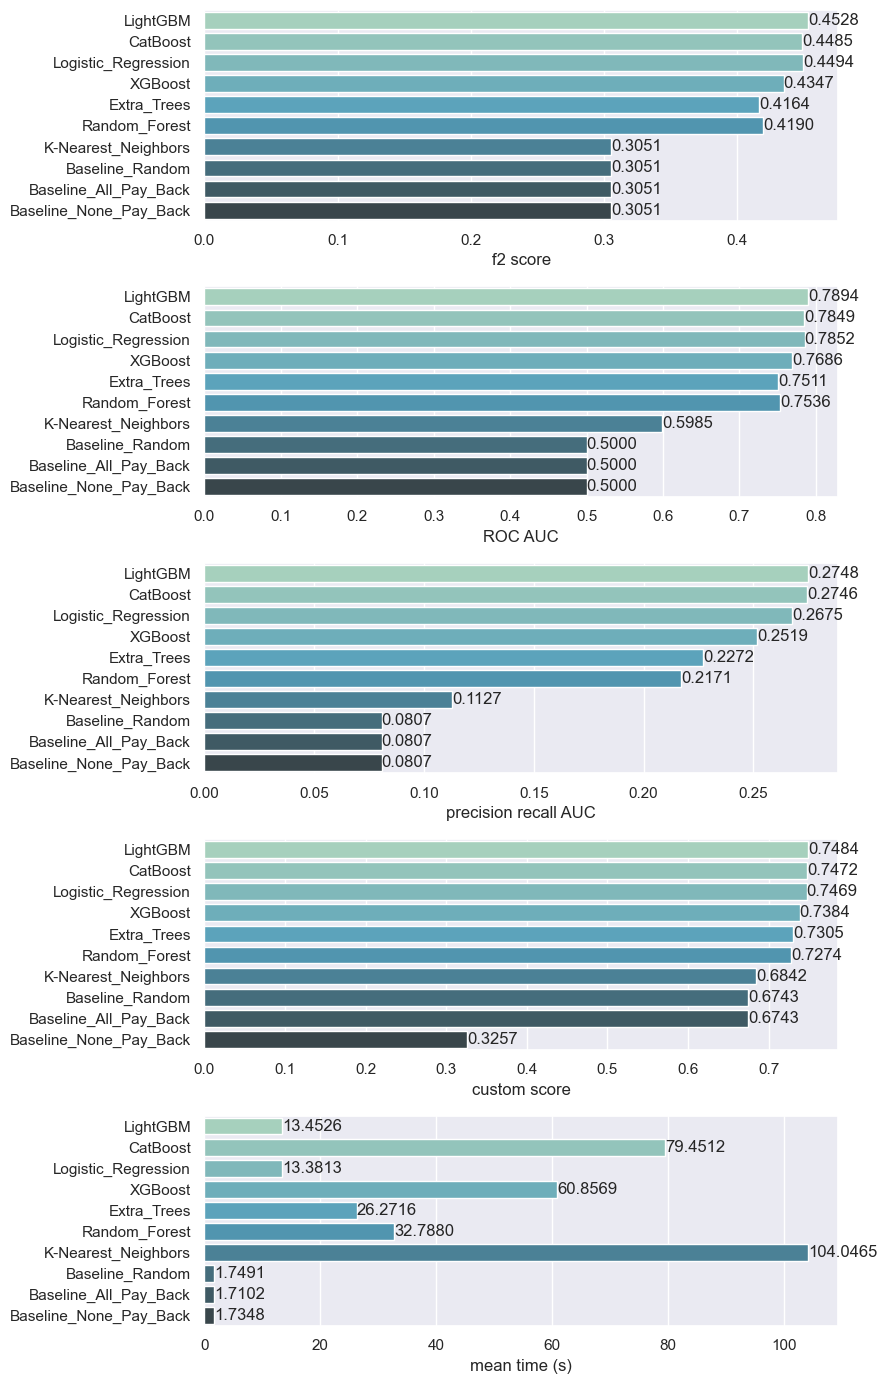

In [232]:
plot_results(results_df, (9, 14))

In [233]:
# mlflow.set_experiment('cross_validation_experiment_features_reduites_cumul')
#
# results_df_reduit = evaluate_models_cross(models, X_train_fs_cumul, y_train, resampling_methods, n_splits=3)
# results_df_reduit = results_df_reduit.sort_values(by='pr_auc_mean', ascending=False)
# results_df_reduit

In [234]:
# results_df_reduit.to_csv('model_selection_df_1_reduit.csv', index=False)

In [235]:
results_df_reduit = pd.read_csv('model_selection_df_1_reduit.csv')
results_df_reduit

,model,resampling,precision_mean,recall_mean,f1_score_mean,f1_score_std,f2_score_mean,roc_auc_mean,roc_auc_std,pr_auc_mean,pr_auc_std,custom_score_mean,time_mean
0,LightGBM,No_Resampling,0.187072,0.694733,0.334345,0.004267,0.450310,0.788283,0.000919,0.272992,0.002301,0.748209,8.076831
1,CatBoost,No_Resampling,0.214822,0.591701,0.330207,0.004753,0.446547,0.782269,0.002314,0.270414,0.004294,0.745745,48.134429
2,Logistic_Regression,No_Resampling,0.183606,0.695992,0.328155,0.003942,0.446679,0.782087,0.000759,0.260946,0.002672,0.744713,9.501513
3,XGBoost,No_Resampling,0.199929,0.584550,0.313900,0.001562,0.430872,0.766754,0.000908,0.248174,0.002587,0.736607,36.392091
4,Extra_Trees,No_Resampling,0.526448,0.006244,0.303522,0.003257,0.420378,0.753012,0.001918,0.229680,0.002620,0.731431,18.048571
5,Random_Forest,No_Resampling,0.457269,0.011633,0.295295,0.001762,0.417760,0.752528,0.001462,0.217076,0.002694,0.727252,27.560623
6,K-Nearest_Neighbors,No_Resampling,0.262248,0.044415,0.210975,0.002443,0.323240,0.617947,0.003121,0.122779,0.001183,0.690110,54.766684
7,Baseline_Random,No_Resampling,0.080548,0.499547,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.674327,1.741718
8,Baseline_All_Pay_Back,No_Resampling,1.000000,0.000000,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.674327,1.725775
9,Baseline_None_Pay_Back,No_Resampling,0.080723,1.000000,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.325673,1.695198


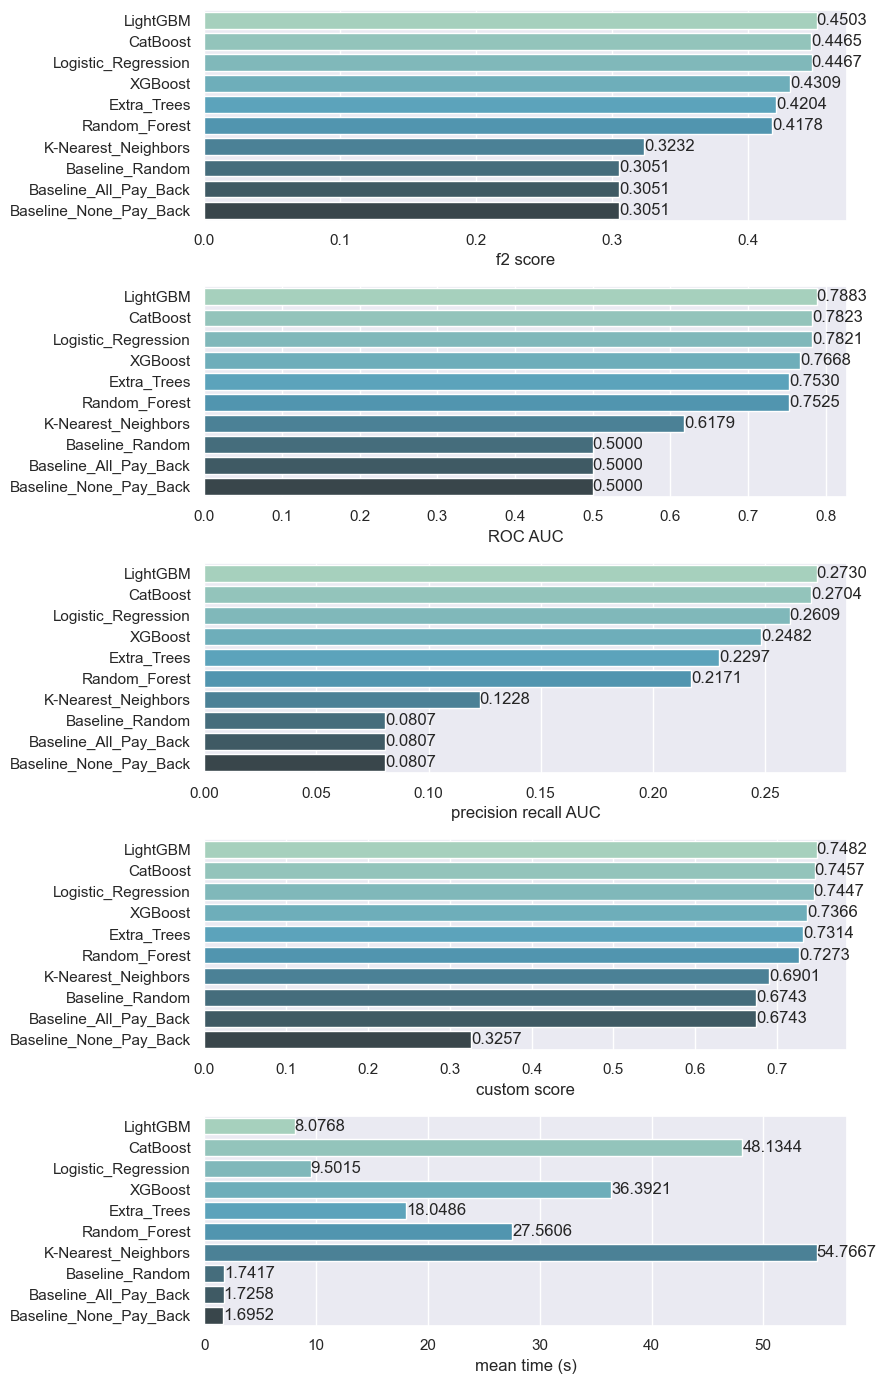

In [236]:
plot_results(results_df_reduit, (9, 14))

In [237]:
# mlflow.set_experiment('cross_validation_experiment_features_reduites_mini')
#
# results_df_mini = evaluate_models_cross(models, X_train_fs_mini, y_train, resampling_methods, n_splits=3)
# results_df_mini = results_df_mini.sort_values(by='pr_auc_mean', ascending=False)
# results_df_mini

In [238]:
# results_df_mini.to_csv('model_selection_df_1_mini.csv', index=False)

In [239]:
results_df_mini = pd.read_csv('model_selection_df_1_mini.csv')
results_df_mini

,model,resampling,precision_mean,recall_mean,f1_score_mean,f1_score_std,f2_score_mean,roc_auc_mean,roc_auc_std,pr_auc_mean,pr_auc_std,custom_score_mean,time_mean
0,LightGBM,No_Resampling,0.187356,0.698459,0.334426,0.004175,0.451899,0.788966,0.001304,0.275682,0.002079,0.748478,4.562774
1,CatBoost,No_Resampling,0.213622,0.596737,0.331205,0.004144,0.448950,0.783744,0.002042,0.274768,0.003292,0.746179,35.543428
2,Logistic_Regression,No_Resampling,0.182130,0.694481,0.326639,0.004002,0.444427,0.780385,0.000852,0.259270,0.003424,0.743449,7.164344
3,XGBoost,No_Resampling,0.200992,0.592758,0.317367,0.004117,0.431456,0.769228,0.002181,0.253914,0.003162,0.738653,28.905607
4,Extra_Trees,No_Resampling,0.571963,0.008561,0.309286,0.004477,0.424417,0.757507,0.003645,0.234000,0.003081,0.734347,12.733225
5,Random_Forest,No_Resampling,0.470003,0.013798,0.302461,0.003356,0.423829,0.757537,0.002300,0.224338,0.003428,0.730907,24.166584
6,K-Nearest_Neighbors,No_Resampling,0.289266,0.053732,0.215064,0.000494,0.328580,0.624496,0.001959,0.128605,0.001636,0.694866,34.699192
7,Baseline_Random,No_Resampling,0.080548,0.499547,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.674327,1.750990
8,Baseline_All_Pay_Back,No_Resampling,1.000000,0.000000,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.674327,1.731026
9,Baseline_None_Pay_Back,No_Resampling,0.080723,1.000000,0.149386,0.000010,0.305099,0.500000,0.000000,0.080723,0.000006,0.325673,1.747302


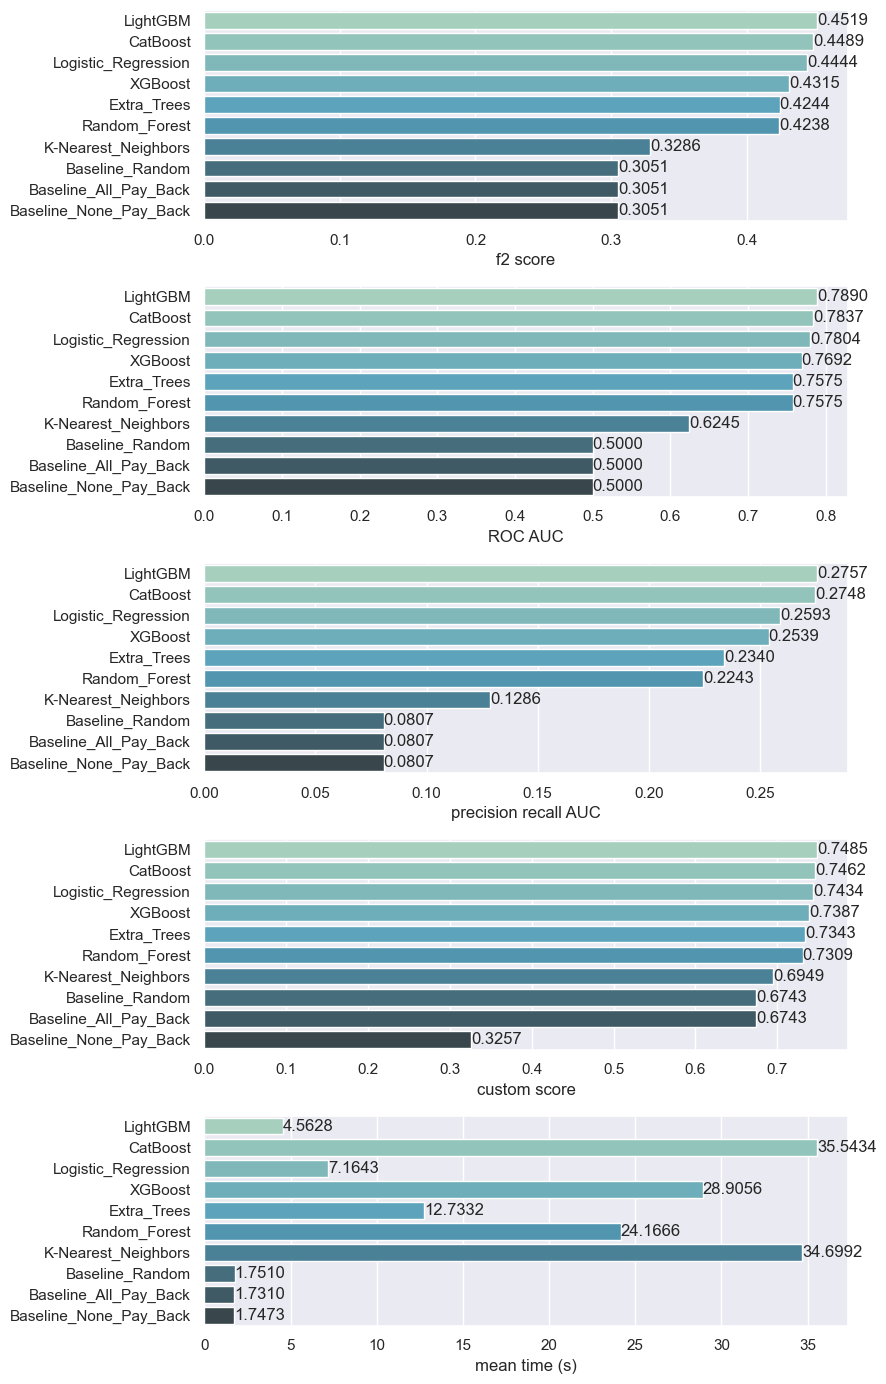

In [240]:
plot_results(results_df_mini, (9, 14))

<br>

---

### <span style='background :#e3e33d' > 3.3 Resampling sur les 3 meilleurs modèles </span>

In [241]:
best_models = {
    'LightGBM': lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(auto_class_weights='Balanced', random_state=42, silent=True),
    'Logistic_Regression': make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1))
}

In [242]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbalancedPipeline

resampling_methods = {
    'Class_weight': None,
    'Random_OverSampling': RandomOverSampler(sampling_strategy=0.3, random_state=42),
    'Random_UnderSampling': RandomUnderSampler(sampling_strategy=0.3, random_state=42),
    'SMOTE': SMOTE(sampling_strategy=0.3, random_state=42),
    'SMOTE_Random_UnderSampling': ImbalancedPipeline([
        ('smote', SMOTE(sampling_strategy=0.3, random_state=42)),
        ('randomundersampler', RandomUnderSampler(sampling_strategy=0.5, random_state=42))
    ])
}

In [243]:
# mlflow.set_experiment('cross_validation_resampling_experiment_full_features')
#
# results_df_2 = evaluate_models_cross(best_models, X_train_fs_lgbm, y_train, resampling_methods, n_splits=3)
# results_df_2 = results_df_2.sort_values(by='pr_auc_mean', ascending=False)
# results_df_2

In [244]:
# results_df_2.to_csv('model_selection_df_2.csv', index=False)

In [245]:
results_df_2 = pd.read_csv('model_selection_df_2.csv')
results_df_2

,model,resampling,precision_mean,recall_mean,f1_score_mean,f1_score_std,f2_score_mean,roc_auc_mean,roc_auc_std,pr_auc_mean,pr_auc_std,custom_score_mean,time_mean
0,CatBoost,Random_UnderSampling,0.327765,0.325763,0.341073,0.002189,0.458188,0.793530,0.001157,0.281051,0.003114,0.751868,42.625769
1,CatBoost,SMOTE,0.513688,0.056300,0.338989,0.000922,0.451639,0.791700,0.000424,0.276894,0.004187,0.750854,86.453412
2,CatBoost,SMOTE_Random_UnderSampling,0.438296,0.135562,0.338901,0.004160,0.454059,0.791180,0.001506,0.276689,0.004818,0.749475,70.529469
3,LightGBM,Random_OverSampling,0.336400,0.293181,0.336029,0.004233,0.451068,0.789191,0.001562,0.276503,0.004828,0.747878,15.531233
4,LightGBM,Class_weight,0.189014,0.695337,0.335924,0.004308,0.452756,0.789419,0.001873,0.274766,0.002946,0.748414,14.191486
5,CatBoost,Class_weight,0.217875,0.590392,0.333099,0.003644,0.448522,0.784914,0.001310,0.274593,0.003649,0.747224,77.972073
6,LightGBM,Random_UnderSampling,0.321363,0.324857,0.335322,0.001385,0.451451,0.789292,0.001165,0.273652,0.004380,0.748300,7.366693
7,LightGBM,SMOTE_Random_UnderSampling,0.444717,0.112247,0.337191,0.003332,0.450503,0.789522,0.001283,0.273159,0.004598,0.749110,14.185088
8,CatBoost,Random_OverSampling,0.360381,0.239551,0.333393,0.005228,0.450590,0.787006,0.001577,0.272453,0.003964,0.747221,84.618981
9,LightGBM,SMOTE,0.514326,0.032632,0.332762,0.003489,0.450936,0.788941,0.001032,0.271049,0.004103,0.747875,17.155433


In [246]:
results_df_2['model_resampling'] = results_df_2['model'] + ' _ ' + results_df_2['resampling']

results_df_2 = results_df_2.sort_values(by='model_resampling')

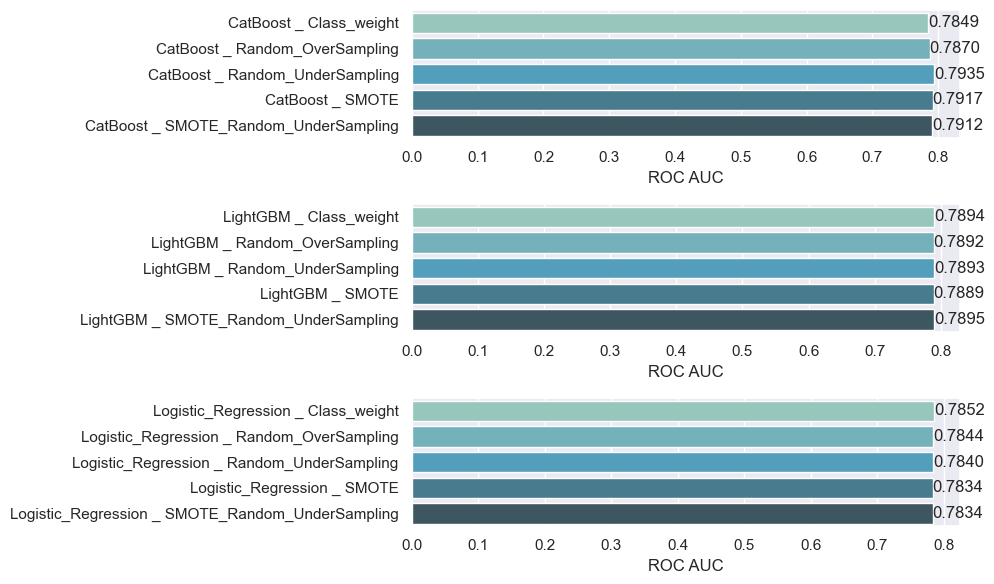

In [247]:
unique_models = results_df_2['model'].unique()

fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2.loc[results_df_2['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["roc_auc_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='ROC AUC', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

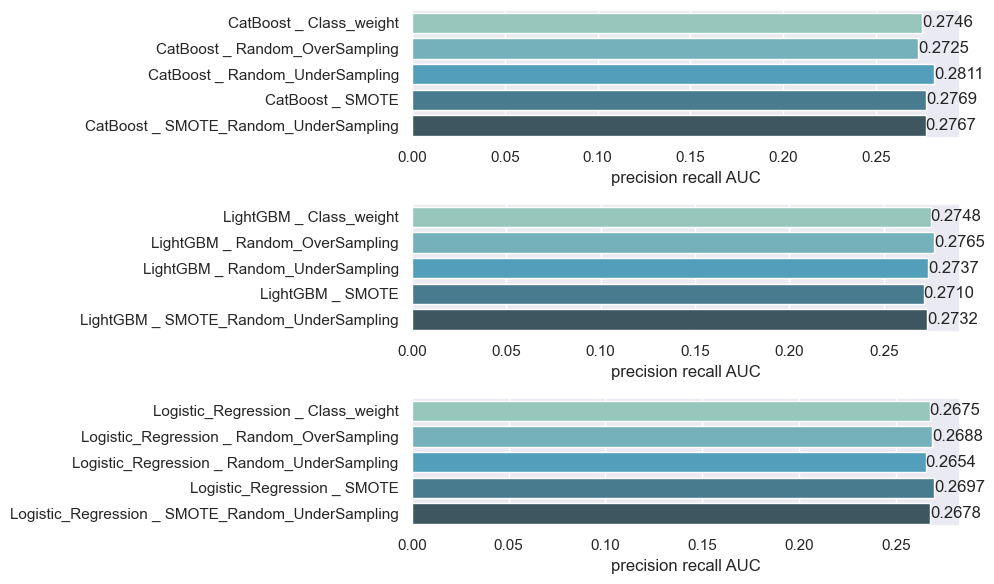

In [248]:
fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2.loc[results_df_2['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["pr_auc_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='precision recall AUC', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

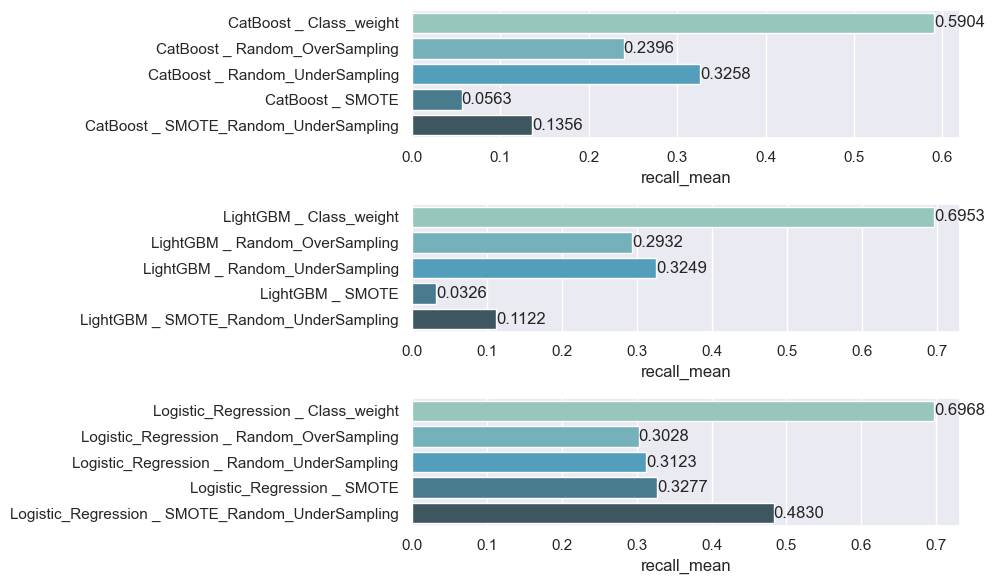

In [249]:
fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2.loc[results_df_2['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["recall_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='recall_mean', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

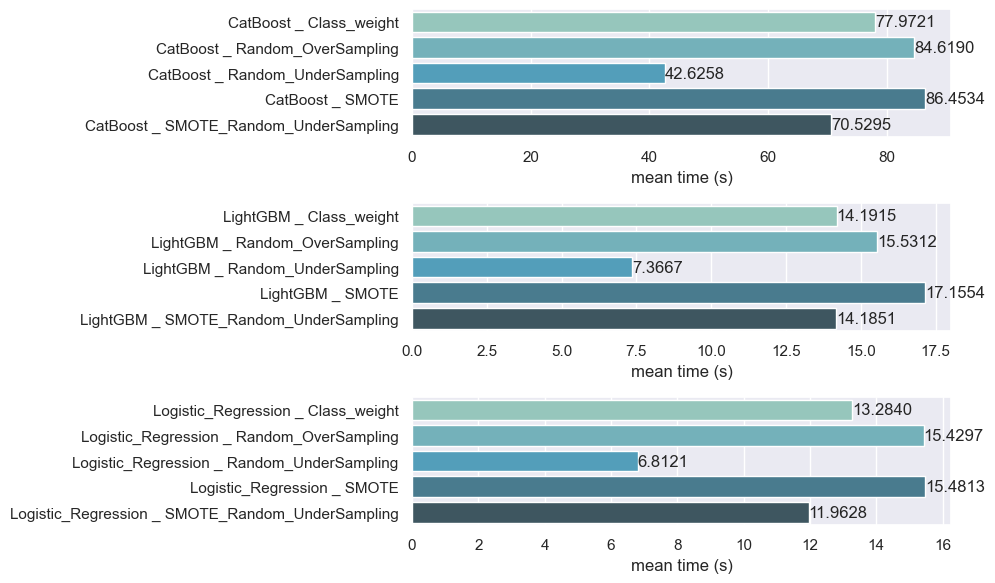

In [250]:
fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2.loc[results_df_2['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["time_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='mean time (s)', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

In [251]:
# mlflow.set_experiment('cross_validation_resampling_experiment_features_reduites_cumul')
#
# results_df_2_reduit = evaluate_models_cross(best_models, X_train_fs_cumul, y_train, resampling_methods, n_splits=3)
# results_df_2_reduit = results_df_2_reduit.sort_values(by='pr_auc_mean', ascending=False)
# results_df_2_reduit

In [252]:
# results_df_2_reduit.to_csv('model_selection_df_2_reduit.csv', index=False)

In [253]:
results_df_2_reduit = pd.read_csv('model_selection_df_2_reduit.csv')
results_df_2_reduit

,model,resampling,precision_mean,recall_mean,f1_score_mean,f1_score_std,f2_score_mean,roc_auc_mean,roc_auc_std,pr_auc_mean,pr_auc_std,custom_score_mean,time_mean
0,CatBoost,Random_UnderSampling,0.325703,0.322993,0.338903,0.001742,0.454147,0.791565,0.001291,0.277727,0.001994,0.749761,27.485973
1,LightGBM,Random_OverSampling,0.336192,0.291772,0.336342,0.002361,0.449492,0.788419,0.001022,0.273952,0.004006,0.748479,8.480814
2,CatBoost,SMOTE_Random_UnderSampling,0.420372,0.137124,0.334844,0.003625,0.450940,0.788330,0.001526,0.273390,0.002137,0.747758,41.078762
3,LightGBM,Class_weight,0.187072,0.694733,0.334345,0.004267,0.450310,0.788283,0.000919,0.272992,0.002301,0.748209,7.299224
4,LightGBM,Random_UnderSampling,0.318394,0.323799,0.333937,0.002180,0.450792,0.788142,0.000925,0.272924,0.004000,0.747459,4.129794
5,CatBoost,SMOTE,0.510687,0.057257,0.332592,0.001557,0.448385,0.787933,0.000373,0.272002,0.003934,0.747595,50.313017
6,CatBoost,Class_weight,0.214822,0.591701,0.330207,0.004753,0.446547,0.782269,0.002314,0.270414,0.004294,0.745745,45.437773
7,LightGBM,SMOTE_Random_UnderSampling,0.423661,0.119096,0.332184,0.005674,0.449488,0.786807,0.001981,0.266857,0.005186,0.747058,6.924302
8,LightGBM,SMOTE,0.494917,0.032481,0.331037,0.005149,0.449489,0.786938,0.001520,0.266525,0.002655,0.746259,9.180882
9,CatBoost,Random_OverSampling,0.353791,0.235220,0.329039,0.001666,0.447479,0.783636,0.002623,0.266421,0.003452,0.744588,49.582167


In [254]:
results_df_2_reduit['model_resampling'] = results_df_2_reduit['model'] + ' _ ' + results_df_2_reduit['resampling']

results_df_2_reduit = results_df_2_reduit.sort_values(by='model_resampling')

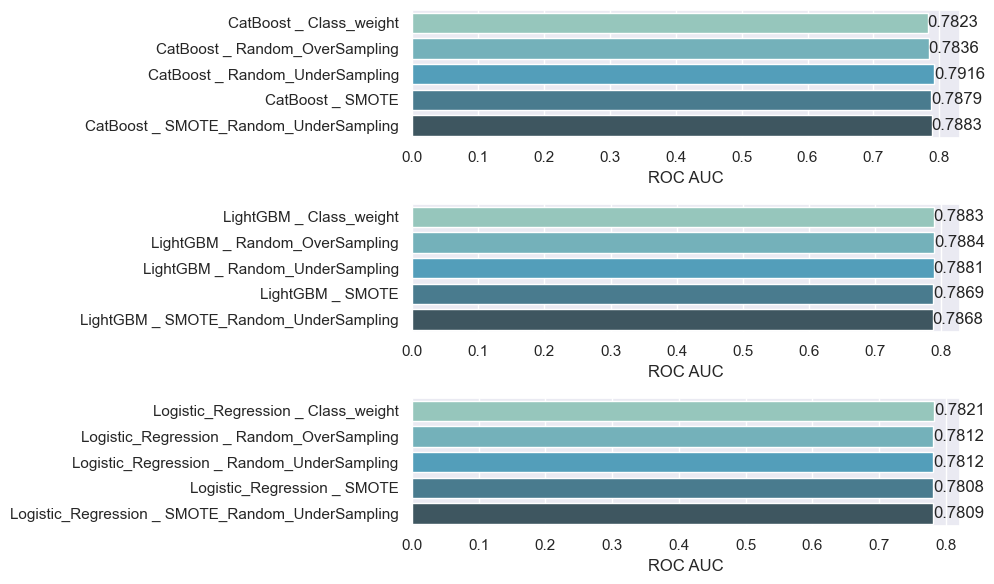

In [255]:
unique_models = results_df_2_reduit['model'].unique()

fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2_reduit.loc[results_df_2_reduit['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["roc_auc_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='ROC AUC', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

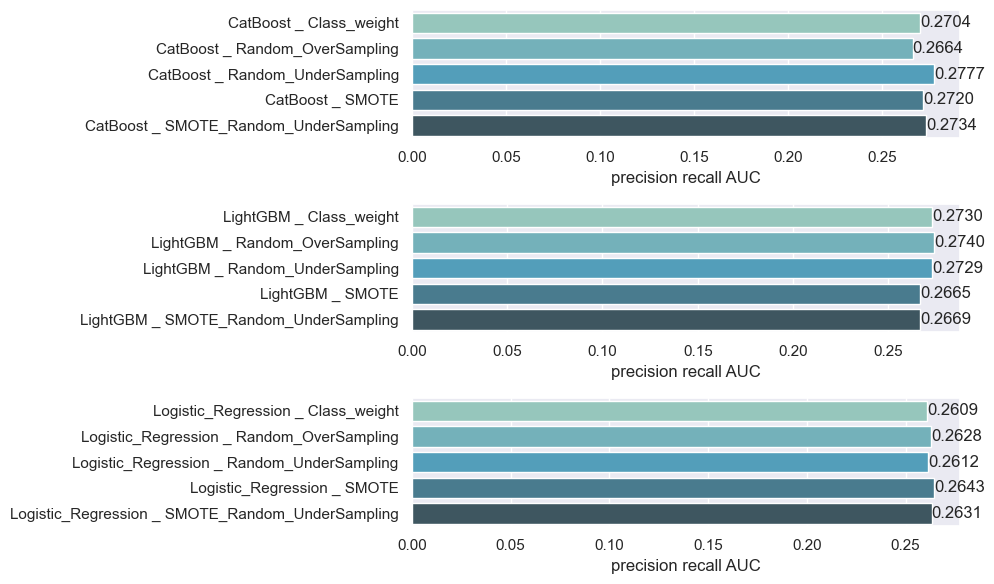

In [256]:
fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2_reduit.loc[results_df_2_reduit['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["pr_auc_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='precision recall AUC', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

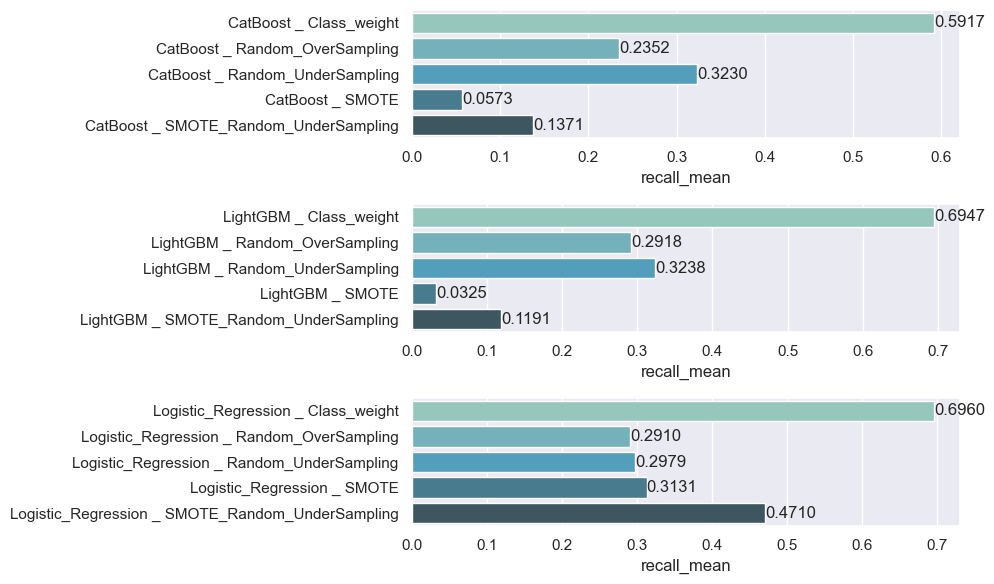

In [257]:
fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2_reduit.loc[results_df_2_reduit['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["recall_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='recall_mean', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

In [258]:
# mlflow.set_experiment('cross_validation_resampling_experiment_features_reduites_mini')
#
# results_df_2_mini = evaluate_models_cross(best_models, X_train_fs_mini, y_train, resampling_methods, n_splits=3)
# results_df_2_mini = results_df_2_mini.sort_values(by='pr_auc_mean', ascending=False)
# results_df_2_mini

In [259]:
# results_df_2_mini.to_csv('model_selection_df_2_mini.csv', index=False)

In [260]:
results_df_2_mini = pd.read_csv('model_selection_df_2_mini.csv')
results_df_2_mini

,model,resampling,precision_mean,recall_mean,f1_score_mean,f1_score_std,f2_score_mean,roc_auc_mean,roc_auc_std,pr_auc_mean,pr_auc_std,custom_score_mean,time_mean
0,CatBoost,Random_UnderSampling,0.326995,0.325864,0.341589,0.001392,0.454823,0.793004,0.001046,0.280563,0.001918,0.751193,19.247930
1,LightGBM,Random_OverSampling,0.337725,0.296253,0.336114,0.002825,0.451105,0.789481,0.001482,0.276943,0.004250,0.748077,4.826250
2,LightGBM,Class_weight,0.187356,0.698459,0.334426,0.004175,0.451899,0.788966,0.001304,0.275682,0.002079,0.748478,4.275702
3,LightGBM,Random_UnderSampling,0.319444,0.322238,0.335628,0.002806,0.451102,0.788782,0.001031,0.275079,0.003990,0.748279,2.961775
4,CatBoost,Class_weight,0.213622,0.596737,0.331205,0.004144,0.448950,0.783744,0.002042,0.274768,0.003292,0.746179,30.878731
5,CatBoost,Random_OverSampling,0.354217,0.240508,0.330526,0.001254,0.448762,0.785023,0.001226,0.269805,0.003258,0.745681,33.505190
6,CatBoost,SMOTE_Random_UnderSampling,0.404454,0.156662,0.330538,0.001139,0.449071,0.786125,0.001521,0.267579,0.000660,0.745922,28.633102
7,CatBoost,SMOTE,0.472177,0.065415,0.328731,0.000290,0.447546,0.785436,0.001210,0.266515,0.001848,0.745831,34.096157
8,Logistic_Regression,SMOTE,0.313211,0.310656,0.327018,0.003672,0.442235,0.779154,0.000517,0.261771,0.003366,0.743649,7.505686
9,Logistic_Regression,Random_OverSampling,0.326418,0.286686,0.326965,0.003440,0.443796,0.779536,0.000910,0.261001,0.003624,0.743684,7.518346


In [261]:
results_df_2_mini['model_resampling'] = results_df_2_mini['model'] + ' _ ' + results_df_2_mini['resampling']

results_df_2_mini = results_df_2_mini.sort_values(by='model_resampling')

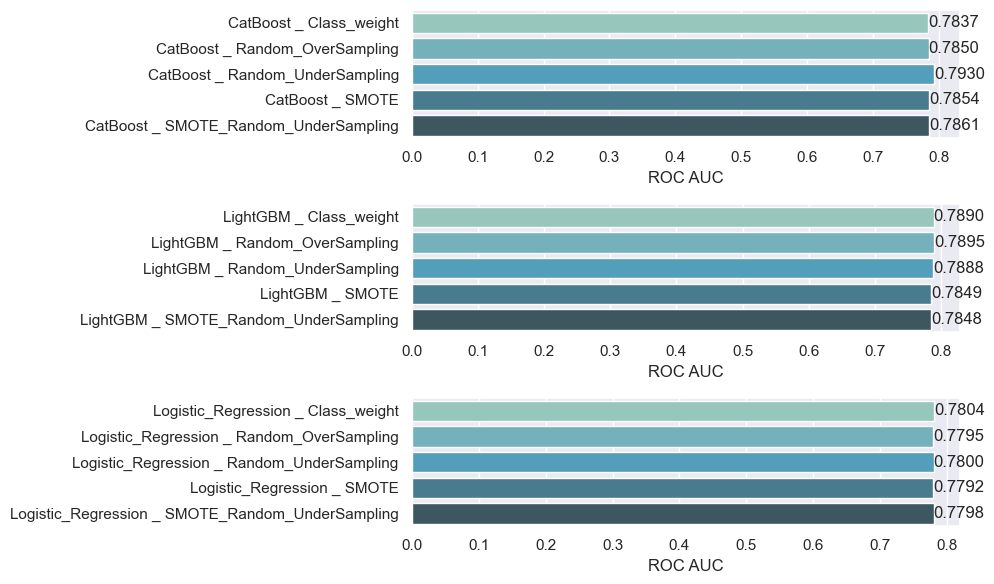

In [262]:
unique_models = results_df_2_mini['model'].unique()

fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2_mini.loc[results_df_2_mini['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["roc_auc_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='ROC AUC', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

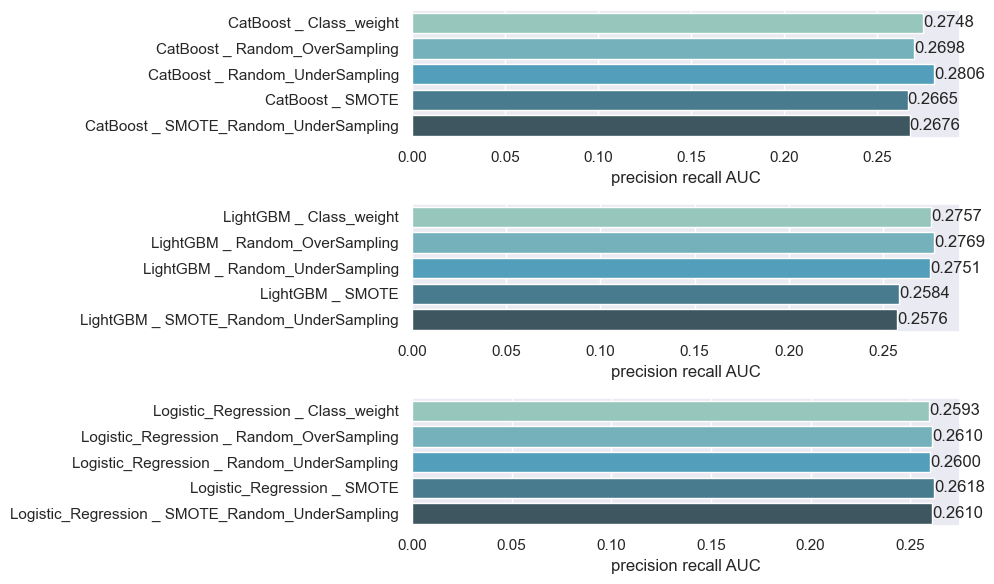

In [263]:
fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2_mini.loc[results_df_2_mini['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["pr_auc_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='precision recall AUC', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

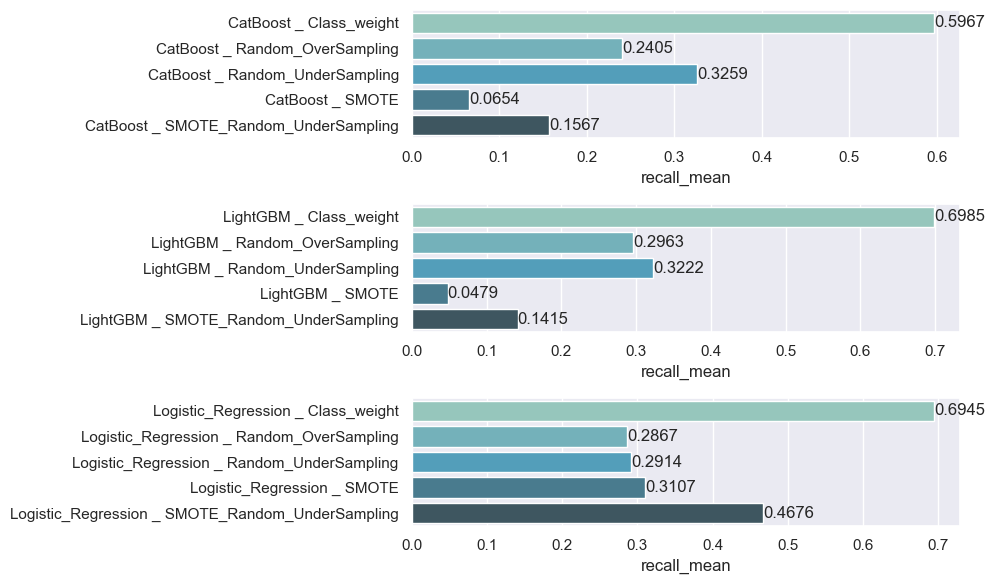

In [264]:
fig, axes = plt.subplots(len(unique_models), 1, figsize=(10, 6))

for idx, m in enumerate(unique_models):
    temp = results_df_2_mini.loc[results_df_2_mini['model'] == m]

    sns.barplot(y=temp['model_resampling'], x=temp["recall_mean"], ax=axes[idx], palette="GnBu_d")
    axes[idx].set(xlabel='recall_mean', ylabel='')
    axes[idx].bar_label(axes[idx].containers[0], fmt="%.4f", size=12)

plt.tight_layout()
plt.show()

<br>

---

##  <span style='background :#96e773' > 4. Optimisation des hyperparamètres </span>
### <span style='background :#e3e33d' > 4.1 Optuna </span>

In [265]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from optuna.integration import LightGBMPruningCallback

def objective(trial, X, y, scoring='average_precision'):

    with mlflow.start_run(run_name=f"trial_{trial.number}"):

        n_splits = 3
        stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Define the hyperparameters to optimize
        params = {
            "boosting_type": trial.suggest_categorical("LightGBM__boosting_type", ["gbdt", "goss"]),
            "num_leaves": trial.suggest_int("LightGBM__num_leaves", 2, 256),
            "max_depth": trial.suggest_int("LightGBM__max_depth", 1, 8),
            "min_child_samples": trial.suggest_int("LightGBM__min_child_samples", 5, 100),
            "min_child_weight": trial.suggest_loguniform("LightGBM__min_child_weight", 1e-5, 1e-2),
            "subsample": trial.suggest_uniform("LightGBM__subsample", 0.1, 1.0),
            "colsample_bytree": trial.suggest_uniform("LightGBM__colsample_bytree", 0.1, 1.0),
            "reg_alpha": trial.suggest_loguniform("LightGBM__reg_alpha", 1e-8, 1e-2),
            "reg_lambda": trial.suggest_loguniform("LightGBM__reg_lambda", 1e-8, 1e-2),
            "learning_rate": trial.suggest_loguniform("LightGBM__learning_rate", 1e-2, 3e-2),
            "n_estimators": trial.suggest_int("LightGBM__n_estimators", 100, 2000)}

        pruning_callback = LightGBMPruningCallback(trial, "average_precision")
        lgbm_clf = lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1, **params, callbacks=[pruning_callback])

        scores = cross_val_score(lgbm_clf, X, y, scoring=scoring, cv=stratified_kfold, n_jobs=-1)

        # Log hyperparameters to MLflow
        for key, value in params.items():
            mlflow.log_param(key, value)

        # Log the average score to MLflow
        mlflow.log_metric("average_score", -np.mean(scores))

        # Enable autologging for LightGBM
        mlflow.lightgbm.autolog()

        return -np.mean(scores)  # Optuna minimizes the objective function, so we return the negative of the average score

In [266]:
# from optuna.samplers import TPESampler
#
# mlflow.set_experiment('optuna_tuning_experiment_1')
#
# # Create a study with sampler and pruner
# sampler = optuna.samplers.TPESampler(seed=42)
# pruner = optuna.pruners.MedianPruner()
# study = optuna.create_study(sampler=sampler, pruner=pruner, direction='minimize')
# study.optimize(lambda trial: objective(trial, X_train_fs_mini, y_train), n_trials=50, timeout=None)
#
# # Print the best set of hyperparameters and the corresponding score
# print("Best trial:")
# trial = study.best_trial
# print("  Score:", -trial.value)
# print("  Params:")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
#
# # Create the final model with the best set of hyperparameters
# best_params = {k[10:]: v for k, v in trial.params.items()}  # Remove the "LightGBM__" prefix
# best_model = lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1, **best_params)

In [267]:
# # Log the best model
# with mlflow.start_run(run_name="best_model"):
#     mlflow.lightgbm.log_model(best_model, "model")
#     mlflow.log_params(best_params)

In [268]:
# import joblib
#
# # Save the study
# joblib.dump(study, "study.pkl")

In [269]:
import joblib

# Load the study
study = joblib.load("study.pkl")

# Print the best set of hyperparameters and the corresponding score
print("Best trial:")
trial = study.best_trial
print("  Score:", -trial.value)
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Create the final model with the best set of hyperparameters
best_params = {k[10:]: v for k, v in trial.params.items()}  # Remove the "LightGBM__" prefix
best_model = lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1, **best_params)

Best trial:
  Score: 0.28638179774854083
  Params:
    LightGBM__boosting_type: goss
    LightGBM__num_leaves: 239
    LightGBM__max_depth: 5
    LightGBM__min_child_samples: 82
    LightGBM__min_child_weight: 2.0821995046104252e-05
    LightGBM__subsample: 0.4085797034730706
    LightGBM__colsample_bytree: 0.5302562259666418
    LightGBM__reg_alpha: 0.00822977661840845
    LightGBM__reg_lambda: 0.00010327856809987313
    LightGBM__learning_rate: 0.010056274263506138
    LightGBM__n_estimators: 1871


In [270]:
# # Save the model
# joblib.dump(best_model, "model_study_1.joblib")

In [271]:
def objective(trial, X, y, scoring='average_precision'):

    with mlflow.start_run(run_name=f"trial_{trial.number}"):

        n_splits = 3
        stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Define the hyperparameters to optimize
        params = {
            "boosting_type": trial.suggest_categorical("LightGBM__boosting_type", ["goss"]),
            "num_leaves": trial.suggest_int("LightGBM__num_leaves", 30, 200),
            "max_depth": trial.suggest_int("LightGBM__max_depth", 4, 6),
            "min_child_samples": trial.suggest_int("LightGBM__min_child_samples", 5, 100),
            "min_child_weight": trial.suggest_loguniform("LightGBM__min_child_weight", 1e-5, 1e-2),
            "subsample": trial.suggest_uniform("LightGBM__subsample", 0.2, 0.9),
            "colsample_bytree": trial.suggest_uniform("LightGBM__colsample_bytree", 0.2, 0.9),
            "reg_alpha": trial.suggest_loguniform("LightGBM__reg_alpha", 1e-8, 1e-6),
            "reg_lambda": trial.suggest_loguniform("LightGBM__reg_lambda", 1e-8, 1e-2),
            "learning_rate": trial.suggest_loguniform("LightGBM__learning_rate", 5e-3, 3e-2),
            "n_estimators": trial.suggest_int("LightGBM__n_estimators", 1000, 2000)
        }

        pruning_callback = LightGBMPruningCallback(trial, "average_precision")
        lgbm_clf = lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1, **params, callbacks=[pruning_callback])

        scores = cross_val_score(lgbm_clf, X, y, scoring=scoring, cv=stratified_kfold, n_jobs=-1)

        # Log hyperparameters to MLflow
        for key, value in params.items():
            mlflow.log_param(key, value)

        # Log the average score to MLflow
        mlflow.log_metric("average_score", -np.mean(scores))

        # Enable autologging for LightGBM
        mlflow.lightgbm.autolog()

        return -np.mean(scores)  # Optuna minimizes the objective function, so we return the negative of the average score

In [272]:
# mlflow.set_experiment('optuna_tuning_experiment_2')
#
# # Create a study with sampler and pruner
# sampler = optuna.samplers.TPESampler(seed=42)
# pruner = optuna.pruners.MedianPruner()
# study_2 = optuna.create_study(sampler=sampler, pruner=pruner, direction='minimize')
# study_2.optimize(lambda trial: objective(trial, X_train_fs_mini, y_train), n_trials=50, timeout=None)
#
# # Print the best set of hyperparameters and the corresponding score
# print("Best trial:")
# trial = study_2.best_trial
# print("  Score:", -trial.value)
# print("  Params:")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")
#
# # Create the final model with the best set of hyperparameters
# best_params = {k[10:]: v for k, v in trial.params.items()}  # Remove the "LightGBM__" prefix
# best_model = lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1, **best_params)

In [273]:
# # Log the best model
# with mlflow.start_run(run_name="best_model"):
#     mlflow.lightgbm.log_model(best_model, "model")
#     mlflow.log_params(best_params)

In [274]:
# # Save the study
# joblib.dump(study_2, "study_2.pkl")

In [275]:
# Load the study
study_2 = joblib.load("study_2.pkl")

# Print the best set of hyperparameters and the corresponding score
print("Best trial:")
trial = study_2.best_trial
print("  Score:", -trial.value)
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Create the final model with the best set of hyperparameters
best_params = {k[10:]: v for k, v in trial.params.items()}  # Remove the "LightGBM__" prefix
best_model = lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight_value, random_state=42, n_jobs=-1, **best_params)

Best trial:
  Score: 0.287085882629342
  Params:
    LightGBM__boosting_type: goss
    LightGBM__num_leaves: 111
    LightGBM__max_depth: 5
    LightGBM__min_child_samples: 94
    LightGBM__min_child_weight: 5.166050203224009e-05
    LightGBM__subsample: 0.3813042668591913
    LightGBM__colsample_bytree: 0.3480218925038123
    LightGBM__reg_alpha: 2.2435897639005464e-08
    LightGBM__reg_lambda: 0.0002665182934762796
    LightGBM__learning_rate: 0.01362241204516248
    LightGBM__n_estimators: 1961


In [276]:
# # Save the model
# joblib.dump(best_model, "model_study_2.joblib")

In [277]:
# # Recherchez l'exécution avec la meilleure métrique
# experiment_id = mlflow.get_experiment_by_name("optuna_tuning_experiment_2").experiment_id
# runs = mlflow.search_runs(experiment_ids=[experiment_id], order_by=["metrics.average_score"])
# best_run = runs.iloc[0]
# run_id = best_run["run_id"]

In [278]:
# run_id = mlflow.search_runs(experiment_ids=[experiment_id], filter_string="run_name='best_model'")['run_id'].item()
# model_uri = f"runs:/{run_id}/best_model"
#
# # Enregistrement du modèle dans le registre de modèles
# model_name = "modèle_lgbtm_optimised"
# mlflow.register_model(model_uri, model_name)

In [279]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10), scoring='average_precision'):

    if cv is None:
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    sns.set_style("darkgrid")

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    sns.lineplot(x=train_sizes, y=train_scores_mean, label="Train", marker="o")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")

    sns.lineplot(x=train_sizes, y=validation_scores_mean, label="Validation", marker="o")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="orange")

    plt.legend(loc="best")
    plt.show()

In [280]:
best_model_opti = joblib.load("model_study_2.joblib")
best_model_opti

LGBMClassifier(boosting_type='goss', colsample_bytree=0.3480218925038123,
               learning_rate=0.01362241204516248, max_depth=5,
               min_child_samples=94, min_child_weight=5.166050203224009e-05,
               n_estimators=1961, num_leaves=111, objective='binary',
               random_state=42, reg_alpha=2.2435897639005464e-08,
               reg_lambda=0.0002665182934762796,
               scale_pos_weight=11.388105549400745,
               subsample=0.3813042668591913)

In [281]:
# plot_learning_curve(best_model_opti, X_train_fs_mini, y_train, scoring='average_precision')

In [282]:
# plot_learning_curve(best_model_opti, X_train_fs_mini, y_train, scoring='roc_auc')

<br>

---

### <span style='background :#e3e33d' > 4.2 Évaluation du meilleur modèle optimisé sur le jeu de validation </span>

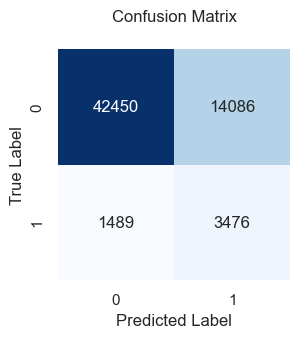

In [283]:
best_model_opti.fit(X_train_fs_mini, y_train)
print_confusion_matrix(best_model_opti, X_valid_fs_mini, y_validation)

TN 42450, FP 14086, TN 3476, FN 1489

In [284]:
# experiment_name = 'validation_scores_experiment'
# mlflow.set_experiment(experiment_name)
# experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

In [285]:
# Make predictions on the validation set
y_pred_proba = best_model_opti.predict_proba(X_valid_fs_mini)[:, 1]
y_pred = best_model_opti.predict(X_valid_fs_mini)

# Find the optimal threshold
thresholds = np.arange(0, 1, 0.01)

# with mlflow.start_run(run_name="validation_scores", experiment_id=experiment_id):

# Calculate the evaluation metrics
precision = precision_score(y_validation, y_pred, zero_division=1.0)
recall = recall_score(y_validation, y_pred)
f1, _ = find_optimal_threshold(y_validation, y_pred_proba, thresholds, score_func=f1_score)
f2, best_threshold_f2 = find_optimal_threshold(y_validation, y_pred_proba, thresholds, score_func=fbeta_score)
custom, _ = find_optimal_threshold(y_validation, y_pred_proba, thresholds, score_func=custom_score)
roc_auc = roc_auc_score(y_validation, y_pred_proba)
pr_auc = average_precision_score(y_validation, y_pred_proba)

    # # Log the evaluation metrics
    # mlflow.log_metric("precision", precision)
    # mlflow.log_metric("recall", recall)
    # mlflow.log_metric("f1", f1)
    # mlflow.log_metric("f2", f2)
    # mlflow.log_metric("roc_auc", roc_auc)
    # mlflow.log_metric("pr_auc", pr_auc)
    # mlflow.log_metric("custom_score", custom)
    #
    # # Log the best model
    # mlflow.lightgbm.log_model(best_model, "model")
    #
    # # Register the model to the MLflow registry
    # run_id = mlflow.active_run().info.run_id
    # model_uri = f"runs:/{run_id}/model"
    # registered_model_name = "modèle_lgbtm_optimised_training_set"
    # mlflow.register_model(model_uri, registered_model_name)

# Print the evaluation metrics
print(f"precision: {format(precision, '.4f')}")
print(f"recall: {format(recall, '.4f')}")
print(f"f1: {format(f1, '.4f')}")
print(f"f2: {format(f2, '.4f')}")
print(f"roc_auc: {format(roc_auc, '.4f')}")
print(f"pr_auc: {format(pr_auc, '.4f')}")
print(f"custom score: {format(custom, '.4f')}")

precision: 0.1979
recall: 0.7001
f1: 0.3478
f2: 0.4644
roc_auc: 0.7956
pr_auc: 0.2899
custom score: 0.7552


precision: 0.1979
recall: 0.7001
f1: 0.3478
f2: 0.4644
roc_auc: 0.7956
pr_auc: 0.2899
custom score: 0.7552

In [286]:
print(best_threshold_f2)

0.5


<br>

---

### <span style='background :#e3e33d' > 4.3 Prédiction sur le jeu de test </span>

In [287]:
# experiment_name = 'final_experiment_test_prediction'
# mlflow.set_experiment(experiment_name)
# experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

In [288]:
temp_total = X_train_fs_mini.append(X_valid_fs_mini)
temp_total_y = y_train.append(y_validation)

In [289]:
best_model.scale_pos_weight = (temp_total_y == 0).sum() / (temp_total_y == 1).sum()

In [290]:
# with mlflow.start_run(run_name="final_fit_train_validation", experiment_id=experiment_id):

best_model_opti.fit(temp_total, temp_total_y)

LGBMClassifier(boosting_type='goss', colsample_bytree=0.3480218925038123,
               learning_rate=0.01362241204516248, max_depth=5,
               min_child_samples=94, min_child_weight=5.166050203224009e-05,
               n_estimators=1961, num_leaves=111, objective='binary',
               random_state=42, reg_alpha=2.2435897639005464e-08,
               reg_lambda=0.0002665182934762796,
               scale_pos_weight=11.388105549400745,
               subsample=0.3813042668591913)

In [291]:
joblib.dump(best_model_opti, "model_prediction.joblib")

['model_prediction.joblib']

In [292]:
# # Log the best model
# mlflow.lightgbm.log_model(best_model_opti, "model")
#
# # Register the model to the MLflow registry
# run_id = mlflow.active_run().info.run_id
# model_uri = f"runs:/{run_id}/model"
# registered_model_name = "final_lgbtm_model_fitted"
# mlflow.register_model(model_uri, registered_model_name)

In [297]:
result_temp = best_model_opti.predict_proba(test_fs_mini.drop(columns='SK_ID_CURR'))[:, 1]

In [298]:
sub_temp = pd.DataFrame()
sub_temp['SK_ID_CURR'] = test_fs_mini['SK_ID_CURR'].astype('int32')
sub_temp['TARGET'] = result_temp

In [299]:
sub_temp.to_csv('submission_lgbm_12.csv', index = False)

Public Score: 0.7898
Private Score: 0.79118

<br>

---

##  <span style='background :#96e773' > 5. Interprétation du modèle avec SHAP </span>

In [ ]:
import shap

explainer = shap.Explainer(best_model_opti, temp_total)
explainer.expected_value

In [ ]:
# # Save the explainer
# joblib.dump(explainer, "explainer.pkl")

In [ ]:
# shap_values = explainer(temp_total, check_additivity=False)

In [ ]:
# # Save the shap values
# joblib.dump(shap_values, "shape.pkl")

In [ ]:
# Load the shap values
shap_values = joblib.load("shape.pkl")

In [ ]:
# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame with the feature names and mean SHAP values
mean_shap_df = pd.DataFrame({"feature": temp_total.columns, "mean_abs_shap_value": mean_abs_shap_values})

# Sort the DataFrame by mean SHAP values in descending order
mean_shap_df = mean_shap_df.sort_values(by="mean_abs_shap_value", ascending=False)
mean_shap_df.head(20)

TARGET_NEIGHBORS_500_MEAN,0.478267
AMT_ANNUITY,0.113795
EXT_SOURCE_MEAN,0.110619

In [ ]:
sns.set_style("darkgrid")
shap.summary_plot(shap_values, temp_total, plot_type="bar", plot_size=(10, 8))

In [ ]:
sns.set_style("darkgrid")
shap.summary_plot(shap_values, temp_total, plot_size=(10, 8))

In [ ]:
# Plot the SHAP force plot for a specific instance
shap.initjs()
instance_idx = 1220  # Change this to the index of the instance you want to analyze
shap.force_plot(explainer.expected_value, shap_values.values[instance_idx, :], temp_total.iloc[instance_idx, :], link='logit')

In [ ]:
# Plot the SHAP waterfall plot for a specific instance
shap.waterfall_plot(shap_values[1220], max_display=30)

In [ ]:
# Plot the SHAP decision plot

instance_idx = 100

sns.set_style("darkgrid")
shap.decision_plot(explainer.expected_value, shap_values.values[instance_idx, :], temp_total.iloc[instance_idx, :], link='logit')

In [ ]:
instance_idx = 99

shap.decision_plot(explainer.expected_value, shap_values.values[instance_idx, :], temp_total.iloc[instance_idx, :], link='logit')

In [ ]:
instance_idx = 1220

shap.decision_plot(explainer.expected_value, shap_values.values[instance_idx, :], temp_total.iloc[instance_idx, :], link='logit')

<br>

---

In [300]:
test_fs_mini.head()

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,EXT_SOURCE_1_TO_BIRTH_RATIO,AMT_ANNUITY,POS_REMAINING_INSTALMENTS,PERC_INC_ANN,DAYS_EMPLOYED_PERC,PREV_DAYS_TERMINATION_MAX,AGE_END,ACTIVE_DEBT_CREDIT_PERCENTAGE_MAX,...,BURO_STATUS_X_MEAN_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_VAR,BURO_AMT_CREDIT_SUM_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,PREV_AMT_ANNUITY_MEAN,EXT_SOURCE_1_DAYS_EMPLOYED,BURO_AMT_CREDIT_SUM_DEBT_MEAN,PREV_PREV_APP_CREDIT_DIFF_MAX,CLOSED_UPDATE_RATIO_MIN
0,100001.0,0.062,0.014277,20560.5,0.0,6.565988,0.121044,-1612.0,55.020460,0.987405,...,0.214590,0.554033,119594.250000,207623.571429,0.777778,3951.000,4.802299,85240.928571,1048.5,1.032877
1,100005.0,0.096,0.011416,17370.0,0.0,5.699482,0.247398,-460.0,50.559150,0.954794,...,0.136752,0.554033,323238.904762,219042.000000,0.818182,4813.200,6.917647,189469.500000,4464.0,1.028571
2,100013.0,0.006,0.012272,69777.0,0.0,2.902102,0.222477,-85.0,55.690754,0.865115,...,0.254545,1.405868,155208.333333,518070.015000,0.888889,11478.195,8.228623,0.000000,3096.0,0.612226
3,100028.0,0.026,0.013730,49018.5,0.0,6.426145,0.133515,-614.0,40.967971,0.838975,...,0.260434,0.044397,224887.238095,138261.370909,0.935484,8091.585,2.687725,18630.450000,6435.0,0.794444
4,100038.0,0.114,0.005658,32067.0,0.0,5.613247,0.168021,-449.0,37.351530,0.865115,...,0.111111,0.554033,323238.904762,203406.000000,0.923077,17782.155,1.213424,44209.500000,-11650.5,0.836066


In [301]:
list_1 = X_train_xgb_med.columns.tolist()
list_2 = X_train_fs_mini.columns.tolist()

ordered_features_list = [item for item in list_1 if item in list_2]

# joblib.dump(ordered_features_list, 'ordered_features_list.joblib')

In [302]:
sub_temp.head()

,SK_ID_CURR,TARGET
0,100001,0.302352
1,100005,0.582694
2,100013,0.086076
3,100028,0.183228
4,100038,0.647286


In [303]:
sub_temp['TARGET_BIN'] = (sub_temp['TARGET'] >= best_threshold_f2).astype(int)
sub_temp['TARGET_BIN'].value_counts(normalize=True)

0    0.723904
1    0.276096
Name: TARGET_BIN, dtype: float64

In [304]:
sub_temp[sub_temp['SK_ID_CURR'] == 450148]

,SK_ID_CURR,TARGET,TARGET_BIN
47920,450148,0.36128,0


In [305]:
from sklearn.model_selection import train_test_split

n = 400  # Number of clients to select

# Calculate the fraction of n clients to be selected from the dataset
sample_fraction = n / len(test_fs_mini)

# Perform stratified sampling using train_test_split
_, test_API = train_test_split(test_fs_mini, test_size=sample_fraction, stratify=sub_temp['TARGET_BIN'], random_state=42)

In [306]:
test_API.shape

(400, 152)

In [307]:
test_API['SK_ID_CURR'] = test_API['SK_ID_CURR'].astype('int')
test_API.to_csv('test_API.csv', index=False)

In [308]:
test_API.head()

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,EXT_SOURCE_1_TO_BIRTH_RATIO,AMT_ANNUITY,POS_REMAINING_INSTALMENTS,PERC_INC_ANN,DAYS_EMPLOYED_PERC,PREV_DAYS_TERMINATION_MAX,AGE_END,ACTIVE_DEBT_CREDIT_PERCENTAGE_MAX,...,BURO_STATUS_X_MEAN_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_VAR,BURO_AMT_CREDIT_SUM_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,PREV_AMT_ANNUITY_MEAN,EXT_SOURCE_1_DAYS_EMPLOYED,BURO_AMT_CREDIT_SUM_DEBT_MEAN,PREV_PREV_APP_CREDIT_DIFF_MAX,CLOSED_UPDATE_RATIO_MIN
47920,450148,0.114,0.013338,5791.5,0.0,20.979021,0.031726,-337.0,25.517844,0.865115,...,0.111111,0.554033,323238.904762,203406.000,0.916667,11994.4125,0.235192,44209.50,1962.0,0.836066
41629,405364,0.136,0.008294,15322.5,0.0,3.377386,0.039109,-1301.0,46.933321,0.865115,...,0.096386,0.554033,166594.000000,28799.775,0.900000,9438.5700,0.687109,0.00,2245.5,0.036865
41864,406848,0.144,0.012876,17905.5,1.0,4.021111,0.066087,-2013.0,38.564972,0.961037,...,0.333333,0.554033,323238.904762,51841.440,1.000000,2097.9450,1.197783,33575.94,1147.5,1.000000
35876,362474,0.074,0.010888,22149.0,1.0,3.657050,-0.632829,-9.0,64.830866,0.616460,...,0.400000,0.554033,323238.904762,225000.000,1.000000,13282.0200,-27.527528,138703.50,-4005.0,0.836066
44840,428243,0.136,0.005807,62482.5,0.0,3.601008,0.090123,-328.0,35.923228,0.818902,...,0.199608,3.243590,2450.000000,487116.750,0.909091,6308.1300,0.636287,357453.00,0.0,1.013699


In [309]:
test_API = pd.read_csv('test_API.csv')
test_API.head()

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,EXT_SOURCE_1_TO_BIRTH_RATIO,AMT_ANNUITY,POS_REMAINING_INSTALMENTS,PERC_INC_ANN,DAYS_EMPLOYED_PERC,PREV_DAYS_TERMINATION_MAX,AGE_END,ACTIVE_DEBT_CREDIT_PERCENTAGE_MAX,...,BURO_STATUS_X_MEAN_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_VAR,BURO_AMT_CREDIT_SUM_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,PREV_AMT_ANNUITY_MEAN,EXT_SOURCE_1_DAYS_EMPLOYED,BURO_AMT_CREDIT_SUM_DEBT_MEAN,PREV_PREV_APP_CREDIT_DIFF_MAX,CLOSED_UPDATE_RATIO_MIN
0,450148,0.114,0.013338,5791.5,0.0,20.979021,0.031726,-337.0,25.517844,0.865115,...,0.111111,0.554033,323238.904762,203406.000,0.916667,11994.4125,0.235192,44209.50,1962.0,0.836066
1,405364,0.136,0.008294,15322.5,0.0,3.377386,0.039109,-1301.0,46.933321,0.865115,...,0.096386,0.554033,166594.000000,28799.775,0.900000,9438.5700,0.687109,0.00,2245.5,0.036865
2,406848,0.144,0.012876,17905.5,1.0,4.021111,0.066087,-2013.0,38.564972,0.961037,...,0.333333,0.554033,323238.904762,51841.440,1.000000,2097.9450,1.197783,33575.94,1147.5,1.000000
3,362474,0.074,0.010888,22149.0,1.0,3.657050,-0.632829,-9.0,64.830866,0.616460,...,0.400000,0.554033,323238.904762,225000.000,1.000000,13282.0200,-27.527528,138703.50,-4005.0,0.836066
4,428243,0.136,0.005807,62482.5,0.0,3.601008,0.090123,-328.0,35.923228,0.818902,...,0.199608,3.243590,2450.000000,487116.750,0.909091,6308.1300,0.636287,357453.00,0.0,1.013699


In [310]:
# Load the pre-processed data
data = pd.read_csv("test_API.csv")  # Replace with the path to your CSV file
# data = data.set_index("client_id")  # Assuming the column name is "client_id"

# Load the model
model = joblib.load("model_prediction.joblib")

In [311]:
client_id = 450148

In [312]:
# Get the features for the given client_id
features = data.loc[data['SK_ID_CURR'] == client_id].drop(columns='SK_ID_CURR').values.reshape(1, -1)

# Make a prediction using the loaded model
prediction = model.predict_proba(features)[:, 1][0]
prediction

0.3612802941266153

In [313]:
sub_temp.loc[sub_temp['SK_ID_CURR'] == client_id]

,SK_ID_CURR,TARGET,TARGET_BIN
47920,450148,0.36128,0


In [314]:
prediction

0.3612802941266153

In [315]:
failure = int(prediction >= 0.5)
failure

0

In [316]:
explainer_API = shap.Explainer(best_model_opti, temp_total)
explainer_API.expected_value

-0.6268862699841872

In [317]:
shap_values_API = explainer_API(features, check_additivity=False)

In [318]:
shape_dash = shap_values_API.values.tolist()

In [319]:
shape_dash

[[0.46771179702140214,
  -0.04438490227312286,
  -0.1542792885057861,
  -0.027389884343174343,
  -0.033310328607567496,
  0.047742308070664874,
  0.03754238642119162,
  -0.15499894518336077,
  0.023428043944222737,
  0.24689386655940326,
  -0.03976849397993647,
  0.00022409204753785162,
  -0.07254340219005825,
  0.12919210789081262,
  0.013653126727149356,
  -0.004851268871971115,
  0.0033769093259797957,
  0.0030894073411400313,
  0.024306460584975865,
  0.012748475193366176,
  -0.039827457465871706,
  0.004478010247112252,
  -0.047577681785223834,
  0.015249709694471677,
  -0.28006330725394946,
  -0.01809575259219855,
  -0.027931294234949746,
  -0.025054136260623635,
  0.024364980110767646,
  -0.0057513729810307265,
  0.018246184612580693,
  -0.008787191262308624,
  -0.007438439131437918,
  0.0063674281085695835,
  -0.01238828444507817,
  0.04187431747888695,
  -0.0056457049275377355,
  0.07359663730581815,
  0.007378650989194284,
  -0.0022649263583298307,
  0.05107023033142468,
  0.

In [ ]:
# shap.decision_plot(explainer_API.expected_value, np.array(shape_dash), data[data['SK_ID_CURR'] == 450148].drop(columns='SK_ID_CURR').squeeze(), link='logit')

In [ ]:
shap.decision_plot(explainer_API.expected_value, shap_values_API.values, data[data['SK_ID_CURR'] == 450148].drop(columns='SK_ID_CURR').squeeze(), link='logit')

In [ ]:
np.array(shape_dash)

In [ ]:
shap_values_API[0]

In [ ]:
shap_values_instance = shap.Explanation(values=np.array(shape_dash)[0],
                                        base_values=explainer_API.expected_value,
                                        data=None, # If you want to include feature names, pass the data here
                                        feature_names=data.drop(columns='SK_ID_CURR').columns.tolist()) # If you want to include feature names, pass the feature names here

In [ ]:
shap_values_instance

In [ ]:
shap.waterfall_plot(shap_values_instance, max_display=20)

In [ ]:
# Get the base value and SHAP values
base_value_temp = explainer_API.expected_value
shap_values_temp = shap_values_API

# Get the index of the instance you want to plot
instance_index = 0

# Create a SHAP values object
shap_values_instance = shap.Explanation(values=shap_values_temp[instance_index],
                                        base_values=base_value_temp,
                                        data=None, # If you want to include feature names, pass the data here
                                        feature_names=data.drop(columns='SK_ID_CURR').columns.tolist()) # If you want to include feature names, pass the feature names here

# Plot the SHAP waterfall plot for a specific instance
shap.waterfall_plot(shap_values_instance, max_display=20)